In [10]:
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np
import os
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
import os                               AutoMinorLocator)
from datetime import datetime

SyntaxError: invalid syntax (<ipython-input-10-52915f45f0da>, line 9)

In [4]:
# Ипорт базы данных в формат данных "пандас.датафрейфм",
# это 2хмерная матрица с заголовками колонок и индексами строк
conn = db.connect('Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=D:\\Kortunov\\transfer\\Esentuk\\РЕЖИМ_по частям.mdb;')
curs = conn.cursor()#эти штуки нужны для работы с базаой курс - это курсор, просто для перемещения по БД
for row in curs.tables(): #этот цикл пробешает по всем таблицам и пишет их имена, просто для навигации
    print(row.table_name)

NameError: name 'db' is not defined

In [5]:
tablename = 'ВСЕ ДАННЫЕ'
df_dyn = pd.read_sql_query("SELECT * FROM [Часть 1_Гидродинамика];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_chem = pd.read_sql_query("SELECT * FROM [Часть 2_Химия];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_chem_msu = pd.read_sql_query("SELECT * FROM [Часть 3_Химия_МГУ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_info = pd.read_sql_query("SELECT * FROM [Скважины_АО_В РАСЧЕТЫ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
# и сохраняем ее в пандас.датафйрем. Все, теперь мы можем с ней работать с помощью питона, причем с возможностью использовать силы модуля пандас
#pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)#это опции визуалицации таблицы, в данном случае я прошу ее показать все колонки. 
#это я вывожу на экран датафрейм. Если в питонге пишешь просто переменную по всему, это тоже самое что команда print
curs.close()#закрываю базу данных, все, больше мы ее не используем, а используем первый датафрем где все данные хранятся для этого блокнота
conn.close()

NameError: name 'pd' is not defined

In [6]:
df_chem_msu

NameError: name 'df_chem_msu' is not defined

In [5]:
df = pd.concat([df_dyn,df_chem], ignore_index=True, sort=False)
df

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор вычисленный МАКСИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Газовый_фактор_(м3_в_м3)_ID_7062,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Напор_ДО_отбора_(ЕЗМВ_Р)__(АО_метры)_ID_7084,Напор_ПРИ_отборе_(ЕЗМВ_Р)__(АО_метры)_ID_7085,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,ПОТЕРИ_при_отборе_(ЕЗМВ_Р)__(литр)_ID_7088,СБРОС_(ЕЗМВ_Р)__(метр_куб)_ID_7089,Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606,pH_водородный_показатель_ID_2201,Ra_(г/литр)_Радиоактивность_ID_7295,Rn_(нКи/литр)_Радиоактивность_ID_7290,U_(г/литр)_Радиоактив

In [198]:
df_2e=  df_chem_msu[df_chem_msu['IDPN'] == 251]
df_2e

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,pH_водородный_показатель_ID_2201,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2/Ar___(отношение_%_V)_ID_7791,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,"МГУ_ГАЗ__δ13С,_CH4___(ПРОМИЛЕ_‰_V)_ID_7792","МГУ_ГАЗ__δ13С,_СО2___(ПРОМИЛЕ_‰_V)_ID_7793",МГУ_ГАЗ__δ15N___(ПРОМИЛЕ_‰_V)_ID_7794,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,МГУ__18О/16О__(ПРОМИЛЕ_‰_V)_ID_7703,МГУ__Ag__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7752,МГУ__Al__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7730,МГУ__As__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7744,МГУ__B__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7729,МГУ__Ba__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7758,МГУ__Be__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7728,МГУ__Bi__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7778,МГУ__Br-___(мг/л)_ID_7721,МГУ__Ca2+__метод_iCAP_(мг/л)_ID_7711,МГУ__Ca2+__метод_Ион_хр_(мг/л)_ID_7710,МГУ__Cd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7753,МГУ__Ce__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7760,МГУ__Cl-___(мг/л)_ID_7716,МГУ__Co__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7738,МГУ__Cr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7735,МГУ__Cs__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7757,МГУ__Cu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7740,МГУ__D/Н__(ПРОМИЛЕ_‰_V)_ID_7704,МГУ__Dy__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7767,МГУ__Er__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7769,МГУ__Eu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7764,МГУ__F-___(мг/л)_ID_7719,МГУ__Fe__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7737,МГУ__Ga__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7742,МГУ__Gd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7765,МГУ__Ge___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7743,МГУ__HCO3-___(мг/л)_ID_7718,МГУ__Hf__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7773,МГУ__Hg__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7781,МГУ__Ho__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7768,МГУ__IC___(мг/л)_ID_7724,МГУ__K+__метод_iCAP_(мг/л)_ID_7708,МГУ__K+__метод_Ион_хр_(мг/л)_ID_7707,МГУ__La__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7759,МГУ__Li__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7727,МГУ__Li+___(мг/л)_ID_7714,МГУ__Lu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7772,МГУ__Mg2+__метод_iCAP_(мг/л)_ID_7713,МГУ__Mg2+__метод_Ион_хр_(мг/л)_ID_7712,МГУ__Mn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7736,МГУ__Mo__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7751,МГУ__Na+__метод_iCAP_(мг/л)_ID_7706,МГУ__Na+__метод_Ион_хр_(мг/л)_ID_7705,МГУ__Na++K+___(мг/л)_ID_7709,МГУ__Nb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7750,МГУ__Nd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7762,МГУ__NH4+___(мг/л)_ID_7715,МГУ__Ni__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7739,МГУ__NO2-___(мг/л)_ID_7720,МГУ__NO3-___(мг/л)_ID_7722,МГУ__P__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7731,МГУ__Pb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7777,МГУ__Pr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7761,МГУ__Rb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7746,МГУ__S__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7732,МГУ__Sb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7755,МГУ__Sc__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7733,МГУ__Se__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7745,МГУ__Si__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7726,МГУ__Sm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7763,МГУ__Sn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7754,МГУ__SO42-___(мг/л)_ID_7717,МГУ__Sr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7747,МГУ__Ta__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7774,МГУ__Tb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7766,МГУ__Te__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7756,МГУ__Th__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7779,МГУ__Tl__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7776,МГУ__Tm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7770,МГУ__TOC___(мг/л)_ID_7725,МГУ__U__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7780,МГУ__V__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7734,МГУ__W___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7775,МГУ__Y__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7748,МГУ__Yb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7771,МГУ__Zn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7741,МГУ__Zr__ме

In [200]:
df_2e_day = df_2e[df_2e['ДАТА'] == '2019-08-19']
df_2e_day

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,pH_водородный_показатель_ID_2201,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2/Ar___(отношение_%_V)_ID_7791,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,"МГУ_ГАЗ__δ13С,_CH4___(ПРОМИЛЕ_‰_V)_ID_7792","МГУ_ГАЗ__δ13С,_СО2___(ПРОМИЛЕ_‰_V)_ID_7793",МГУ_ГАЗ__δ15N___(ПРОМИЛЕ_‰_V)_ID_7794,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,МГУ__18О/16О__(ПРОМИЛЕ_‰_V)_ID_7703,МГУ__Ag__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7752,МГУ__Al__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7730,МГУ__As__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7744,МГУ__B__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7729,МГУ__Ba__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7758,МГУ__Be__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7728,МГУ__Bi__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7778,МГУ__Br-___(мг/л)_ID_7721,МГУ__Ca2+__метод_iCAP_(мг/л)_ID_7711,МГУ__Ca2+__метод_Ион_хр_(мг/л)_ID_7710,МГУ__Cd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7753,МГУ__Ce__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7760,МГУ__Cl-___(мг/л)_ID_7716,МГУ__Co__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7738,МГУ__Cr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7735,МГУ__Cs__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7757,МГУ__Cu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7740,МГУ__D/Н__(ПРОМИЛЕ_‰_V)_ID_7704,МГУ__Dy__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7767,МГУ__Er__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7769,МГУ__Eu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7764,МГУ__F-___(мг/л)_ID_7719,МГУ__Fe__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7737,МГУ__Ga__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7742,МГУ__Gd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7765,МГУ__Ge___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7743,МГУ__HCO3-___(мг/л)_ID_7718,МГУ__Hf__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7773,МГУ__Hg__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7781,МГУ__Ho__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7768,МГУ__IC___(мг/л)_ID_7724,МГУ__K+__метод_iCAP_(мг/л)_ID_7708,МГУ__K+__метод_Ион_хр_(мг/л)_ID_7707,МГУ__La__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7759,МГУ__Li__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7727,МГУ__Li+___(мг/л)_ID_7714,МГУ__Lu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7772,МГУ__Mg2+__метод_iCAP_(мг/л)_ID_7713,МГУ__Mg2+__метод_Ион_хр_(мг/л)_ID_7712,МГУ__Mn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7736,МГУ__Mo__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7751,МГУ__Na+__метод_iCAP_(мг/л)_ID_7706,МГУ__Na+__метод_Ион_хр_(мг/л)_ID_7705,МГУ__Na++K+___(мг/л)_ID_7709,МГУ__Nb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7750,МГУ__Nd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7762,МГУ__NH4+___(мг/л)_ID_7715,МГУ__Ni__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7739,МГУ__NO2-___(мг/л)_ID_7720,МГУ__NO3-___(мг/л)_ID_7722,МГУ__P__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7731,МГУ__Pb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7777,МГУ__Pr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7761,МГУ__Rb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7746,МГУ__S__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7732,МГУ__Sb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7755,МГУ__Sc__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7733,МГУ__Se__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7745,МГУ__Si__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7726,МГУ__Sm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7763,МГУ__Sn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7754,МГУ__SO42-___(мг/л)_ID_7717,МГУ__Sr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7747,МГУ__Ta__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7774,МГУ__Tb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7766,МГУ__Te__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7756,МГУ__Th__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7779,МГУ__Tl__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7776,МГУ__Tm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7770,МГУ__TOC___(мг/л)_ID_7725,МГУ__U__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7780,МГУ__V__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7734,МГУ__W___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7775,МГУ__Y__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7748,МГУ__Yb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7771,МГУ__Zn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7741,МГУ__Zr__ме

In [12]:
df_2e_day.max()

Year                                                 2020
Month                                                   1
Day                                                     9
Hour                                                    0
Minute                                                  0
                                                     ... 
МГУ__Zn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7741    None
МГУ__Zr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7749    None
МГУ__δ13C/12C___(ПРОМИЛЕ_‰_V)_ID_7701                None
МГУ__δ18O/16OTIC__(ПРОМИЛЕ_‰_V)_ID_7702              None
МГУ__ТС___(мг/л)_ID_7723                             None
Length: 102, dtype: object

In [6]:
df_info

,ID PN,Номер скважины,ЗАПАСЫ м куб в сутки,ПЛАН ЗАПАСЫ м куб в сутки,Горизонт,АО устья,АО Точки Замера,abs,аотз,АО ЗЕМЛИ,Высота ТИ манометром_уровнемером,Высота ТИ датчиком давления,Высота загрузки датчика давления от ТИ датчиком,ТОЧКА ИЗМЕРЕНИЯ СОГЛАСОВАННАЯ,Участок,Недропользователь,Назначение скважины,Датчик SOLINST,КОД,ДОЛГОТА МЕТРЫ,ШИРОТА МЕТРЫ,ДОЛГОТА ГРАДУСЫ,ШИРОТА ГРАДУСЫ,Тип воды,gkx,gky,glub,состояние,Примечания
0,110,418ʹ,4.0,4.0,P1d - sl,596.90,595.25,595.250000,595.250000,597.330,0.595,0.595,-0.160,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,True,None,8329087.145,4881188.200,42.867500,44.045611,Ессентуки-4,4868520.00,3210675.00,155.199997,Резервная,None
1,104,41-бис,2.0,2.0,P1d - sl,600.51,602.98,600.510010,602.940002,600.510,1.170,1.170,0.000,ТИ - фланец,Центральный,АО «КМКР»,эксплуатационная,False,None,8328753.445,4880091.155,42.863694,44.035667,Ессентуки-4,4867400.00,3210360.00,115.000000,Эксплуатационная,None
2,105,56,1.5,1.5,P1d - sl,592.94,595.40,592.940002,595.400024,592.940,1.315,1.315,-27.600,ТИ - фланец,Центральный,АО «КМКР»,эксплуатационная,True,None,8329653.211,4881281.650,42.874528,44.046583,Ессентуки-4,4868625.00,3211250.00,190.500000,Эксплуатационная,В процессе работы скважины абс. Отметка точки ...
3,107,57-РЭ-бис,25.0,25.0,P1d - sl,599.74,602.66,599.760010,602.659973,599.760,2.465,2.465,0.000,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,False,None,NaN,NaN,NaN,NaN,Ессентуки-4,4867080.00,3210425.00,92.000000,Эксплуатационная,None
4,111,1-Э,160.0,160.0,К2,609.08,609.08,609.539978,609.169983,609.540,-0.800,-0.800,-0.160,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,True,None,NaN,NaN,NaN,NaN,Сероводородные,4868640.00,3210660.00,462.000000,Эксплуатационная,None
5,112,2-Э,40.0,40.0,К2,618.73,618.73,619.400024,618.729980,619.400,-1.022,-1.022,-0.153,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,True,None,8328521.541,4881283.150,42.860417,44.046333,Сероводородные,4868610.00,3210105.00,435.000000,Эксплуатационная,None
6,141,55,175.0,175.0,K1a - al1,669.80,669.80,669.349976,669.799988,669.350,1.075,1.075,0.125,ТИ - ось манометра,Средне-Ессентукский,АО «КМКР»,эксплуатационная,True,None,8330946.723,4885770.209,42.889222,44.087250,Азотные термальные,4873140.00,3212465.00,1221.650024,Эксплуатационная,None
7,90020,1-КМВ,NaN,NaN,J3tt - K1v,669.68,669.68,NaN,NaN,NaN,NaN,NaN,NaN,None,Средне-Ессентукский,АО «КМКР»,None,False,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None
8,140,1-КМВ-бис,100.0,100.0,J3tt - K1v,671.35,671.35,669.549988,671.349976,669.550,2.145,2.145,-0.155,ТИ - ось манометра,Средне-Ессентукский,АО «КМКР»,эксплуатационная,True,None,8330939.175,4885822.880,42.889111,44.087722,Слабоуглекислые термальные,4873170.00,3212480.00,1468.000000,Эксплуатационная,None
9,106,57-РЭ,NaN,NaN,P1d - sl,599.76,602.97,599.760010,602.969971,599.760,1.615,1.615,-18.200,ТИ - фланец,Центральный,АО «КМКР»,наблюдательная,True,None,8328813.591,4879743.681,42.864556,44.032556,None,NaN,NaN,90.000000,Резервная,None


In [207]:
df_chem_2e =df_chem_msu[df_chem_msu['IDPN'] ==251]

In [208]:
df_dyn_temp =df_dyn[df_dyn['IDPN'] == 251]
df_dyn

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор вычисленный МАКСИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Газовый_фактор_(м3_в_м3)_ID_7062,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Напор_ДО_отбора_(ЕЗМВ_Р)__(АО_метры)_ID_7084,Напор_ПРИ_отборе_(ЕЗМВ_Р)__(АО_метры)_ID_7085,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,ПОТЕРИ_при_отборе_(ЕЗМВ_Р)__(литр)_ID_7088,СБРОС_(ЕЗМВ_Р)__(метр_куб)_ID_7089,Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606
256728,2009,1,2,0,0,97,2009-01-02,3.70,NaN,NaN,NaN,606.460,607.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3

In [146]:
df_dyn_temp['Напор вычисленный АО (м)'].dropna()

417952    835.181022
418009    829.410407
418065    830.457328
418118    828.969596
418171    823.695945
             ...    
441141    853.177482
441194    853.229743
441248    853.312873
441312    853.217551
441366    853.186225
Name: Напор вычисленный АО (м), Length: 422, dtype: float64

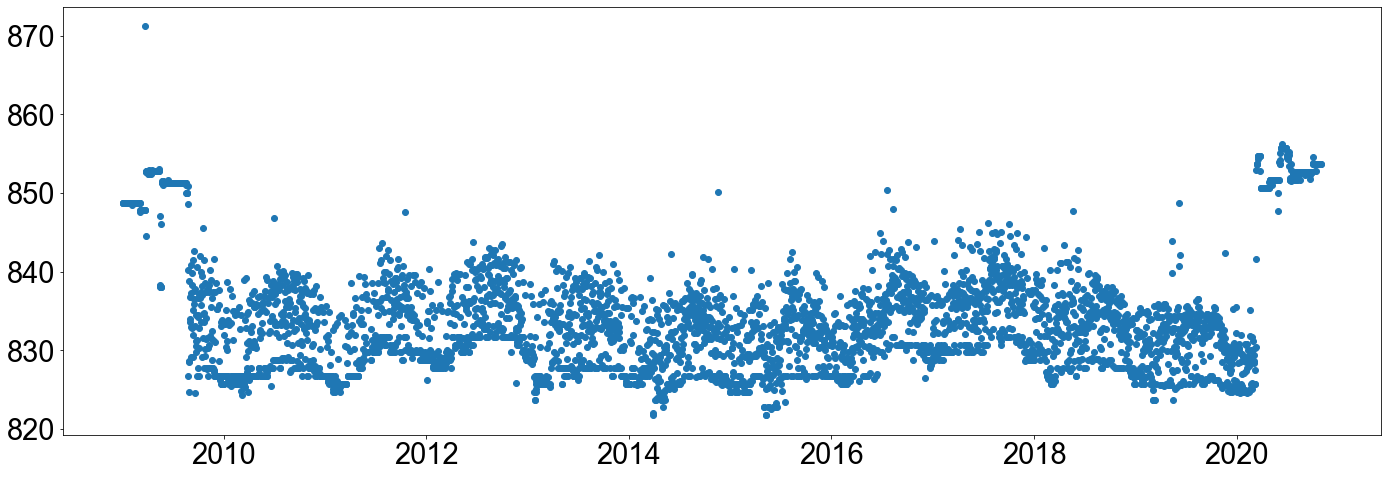

In [148]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_dyn_temp['ДАТА'],df_dyn_temp['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'],"o")

In [165]:
df_chem_2e

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,pH_водородный_показатель_ID_2201,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2/Ar___(отношение_%_V)_ID_7791,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,"МГУ_ГАЗ__δ13С,_CH4___(ПРОМИЛЕ_‰_V)_ID_7792","МГУ_ГАЗ__δ13С,_СО2___(ПРОМИЛЕ_‰_V)_ID_7793",МГУ_ГАЗ__δ15N___(ПРОМИЛЕ_‰_V)_ID_7794,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,МГУ__18О/16О__(ПРОМИЛЕ_‰_V)_ID_7703,МГУ__Ag__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7752,МГУ__Al__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7730,МГУ__As__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7744,МГУ__B__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7729,МГУ__Ba__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7758,МГУ__Be__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7728,МГУ__Bi__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7778,МГУ__Br-___(мг/л)_ID_7721,МГУ__Ca2+__метод_iCAP_(мг/л)_ID_7711,МГУ__Ca2+__метод_Ион_хр_(мг/л)_ID_7710,МГУ__Cd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7753,МГУ__Ce__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7760,МГУ__Cl-___(мг/л)_ID_7716,МГУ__Co__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7738,МГУ__Cr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7735,МГУ__Cs__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7757,МГУ__Cu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7740,МГУ__D/Н__(ПРОМИЛЕ_‰_V)_ID_7704,МГУ__Dy__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7767,МГУ__Er__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7769,МГУ__Eu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7764,МГУ__F-___(мг/л)_ID_7719,МГУ__Fe__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7737,МГУ__Ga__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7742,МГУ__Gd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7765,МГУ__Ge___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7743,МГУ__HCO3-___(мг/л)_ID_7718,МГУ__Hf__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7773,МГУ__Hg__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7781,МГУ__Ho__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7768,МГУ__IC___(мг/л)_ID_7724,МГУ__K+__метод_iCAP_(мг/л)_ID_7708,МГУ__K+__метод_Ион_хр_(мг/л)_ID_7707,МГУ__La__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7759,МГУ__Li__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7727,МГУ__Li+___(мг/л)_ID_7714,МГУ__Lu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7772,МГУ__Mg2+__метод_iCAP_(мг/л)_ID_7713,МГУ__Mg2+__метод_Ион_хр_(мг/л)_ID_7712,МГУ__Mn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7736,МГУ__Mo__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7751,МГУ__Na+__метод_iCAP_(мг/л)_ID_7706,МГУ__Na+__метод_Ион_хр_(мг/л)_ID_7705,МГУ__Na++K+___(мг/л)_ID_7709,МГУ__Nb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7750,МГУ__Nd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7762,МГУ__NH4+___(мг/л)_ID_7715,МГУ__Ni__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7739,МГУ__NO2-___(мг/л)_ID_7720,МГУ__NO3-___(мг/л)_ID_7722,МГУ__P__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7731,МГУ__Pb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7777,МГУ__Pr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7761,МГУ__Rb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7746,МГУ__S__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7732,МГУ__Sb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7755,МГУ__Sc__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7733,МГУ__Se__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7745,МГУ__Si__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7726,МГУ__Sm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7763,МГУ__Sn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7754,МГУ__SO42-___(мг/л)_ID_7717,МГУ__Sr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7747,МГУ__Ta__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7774,МГУ__Tb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7766,МГУ__Te__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7756,МГУ__Th__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7779,МГУ__Tl__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7776,МГУ__Tm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7770,МГУ__TOC___(мг/л)_ID_7725,МГУ__U__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7780,МГУ__V__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7734,МГУ__W___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7775,МГУ__Y__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7748,МГУ__Yb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7771,МГУ__Zn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7741,МГУ__Zr__ме

In [22]:
df_chem_2e

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,pH_водородный_показатель_ID_2201,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2/Ar___(отношение_%_V)_ID_7791,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,"МГУ_ГАЗ__δ13С,_CH4___(ПРОМИЛЕ_‰_V)_ID_7792","МГУ_ГАЗ__δ13С,_СО2___(ПРОМИЛЕ_‰_V)_ID_7793",МГУ_ГАЗ__δ15N___(ПРОМИЛЕ_‰_V)_ID_7794,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,МГУ__18О/16О__(ПРОМИЛЕ_‰_V)_ID_7703,МГУ__Ag__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7752,МГУ__Al__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7730,МГУ__As__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7744,МГУ__B__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7729,МГУ__Ba__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7758,МГУ__Be__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7728,МГУ__Bi__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7778,МГУ__Br-___(мг/л)_ID_7721,МГУ__Ca2+__метод_iCAP_(мг/л)_ID_7711,МГУ__Ca2+__метод_Ион_хр_(мг/л)_ID_7710,МГУ__Cd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7753,МГУ__Ce__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7760,МГУ__Cl-___(мг/л)_ID_7716,МГУ__Co__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7738,МГУ__Cr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7735,МГУ__Cs__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7757,МГУ__Cu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7740,МГУ__D/Н__(ПРОМИЛЕ_‰_V)_ID_7704,МГУ__Dy__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7767,МГУ__Er__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7769,МГУ__Eu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7764,МГУ__F-___(мг/л)_ID_7719,МГУ__Fe__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7737,МГУ__Ga__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7742,МГУ__Gd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7765,МГУ__Ge___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7743,МГУ__HCO3-___(мг/л)_ID_7718,МГУ__Hf__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7773,МГУ__Hg__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7781,МГУ__Ho__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7768,МГУ__IC___(мг/л)_ID_7724,МГУ__K+__метод_iCAP_(мг/л)_ID_7708,МГУ__K+__метод_Ион_хр_(мг/л)_ID_7707,МГУ__La__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7759,МГУ__Li__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7727,МГУ__Li+___(мг/л)_ID_7714,МГУ__Lu__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7772,МГУ__Mg2+__метод_iCAP_(мг/л)_ID_7713,МГУ__Mg2+__метод_Ион_хр_(мг/л)_ID_7712,МГУ__Mn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7736,МГУ__Mo__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7751,МГУ__Na+__метод_iCAP_(мг/л)_ID_7706,МГУ__Na+__метод_Ион_хр_(мг/л)_ID_7705,МГУ__Na++K+___(мг/л)_ID_7709,МГУ__Nb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7750,МГУ__Nd__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7762,МГУ__NH4+___(мг/л)_ID_7715,МГУ__Ni__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7739,МГУ__NO2-___(мг/л)_ID_7720,МГУ__NO3-___(мг/л)_ID_7722,МГУ__P__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7731,МГУ__Pb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7777,МГУ__Pr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7761,МГУ__Rb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7746,МГУ__S__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7732,МГУ__Sb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7755,МГУ__Sc__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7733,МГУ__Se__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7745,МГУ__Si__метод_iCAP/ICP_MS_(ppm_-_мг/кг)_ID_7726,МГУ__Sm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7763,МГУ__Sn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7754,МГУ__SO42-___(мг/л)_ID_7717,МГУ__Sr__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7747,МГУ__Ta__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7774,МГУ__Tb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7766,МГУ__Te__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7756,МГУ__Th__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7779,МГУ__Tl__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7776,МГУ__Tm__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7770,МГУ__TOC___(мг/л)_ID_7725,МГУ__U__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7780,МГУ__V__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7734,МГУ__W___метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7775,МГУ__Y__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7748,МГУ__Yb__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7771,МГУ__Zn__метод_iCAP/ICP_MS_(ppb_-_мкг/кг)_ID_7741,МГУ__Zr__ме

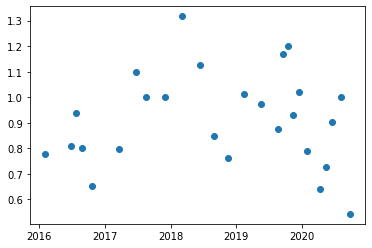

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_dyn_temp['ДАТА'],df_dyn_temp['Газовый_фактор_(м3_в_м3)_ID_7062'],"o")

In [148]:
df_chem_2e['Газовый_фактор_(м3_в_м3)_ID_7062'].max()

nan

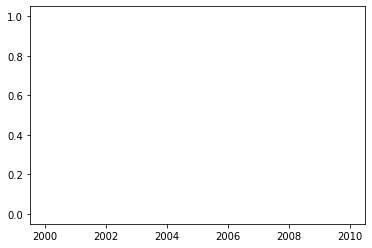

In [157]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_chem_2e['ДАТА'],df_chem_2e['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],"o")


In [163]:

pd.options.display.max_rows = 44

In [20]:
df_dyn_temp[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna()

,ДАТА,Газовый_фактор_(м3_в_м3)_ID_7062
355459,2016-02-05 00:00:00,0.778
362505,2016-06-28 00:00:00,0.807
363818,2016-07-25 00:00:00,0.937
365277,2016-08-24 00:00:00,0.803
367966,2016-10-19 00:00:00,0.651
375033,2017-03-21 00:00:00,0.796
379297,2017-06-21 00:00:00,1.098
381841,2017-08-16 00:00:00,1.000
386908,2017-11-29 00:00:00,1.000
391398,2018-03-07 00:00:00,1.317


In [124]:
df_dyn_temp[['ДАТА','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076']].dropna()

In [21]:
df_dyn_temp['ДАТА'] = pd.to_datetime(df_dyn_temp['ДАТА'])

In [27]:
df_dyn['ДАТА'] = pd.to_datetime(df_dyn['ДАТА'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 197-01-20 00:00:00

In [22]:
temperature = df_dyn_temp[['ДАТА','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076']].dropna().loc[df_dyn_temp['ДАТА'] == '2019-08-20', 'Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076'].values
temperature

array([18.50972176])

In [210]:
#az = df_chem_2e[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna().loc[df_chem_2e['ДАТА'] == '2019-08-20', 'Газовый_фактор_(м3_в_м3)_ID_7062'].values
gaz =df_dyn_temp[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna().loc[df_dyn_temp['ДАТА'] == '2019-08-20', 'Газовый_фактор_(м3_в_м3)_ID_7062'].values
gaz

array([1.16999996])

In [26]:
df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().loc[df_dyn['ДАТА'] == '2019-08-20', 'P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']

Series([], Name: P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110, dtype: float64)

,ДАТА,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110
394479,2019-05-30,94.832329
394527,2019-05-31,94.739136
394572,2019-06-01,94.554497
394616,2019-06-02,94.546394
394673,2019-06-03,94.501129
...,...,...
417423,2020-07-31,94.254250
417442,2020-08-01,93.716354
417461,2020-08-02,94.002647
417480,2020-08-03,94.465591


In [19]:
atm_pressure = df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().loc[df_dyn['ДАТА'] == '2019-08-20', 'P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].to_numpy()*7.50062
atm_pressure

array([], dtype=float64)

In [177]:
water_pressure = 12
# from barry et al page 112

array([94.74355316])

In [196]:
gaz_ntd = 0.3595*gaz*((atm_pressure-12)/(273.2+temperature))
gaz_ntd


array([0.75336706])

In [195]:
gaz

array([0.875])

In [232]:
P_ust = df_dyn_temp[['ДАТА','Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075']].dropna().loc[df_dyn_temp['ДАТА'] == '2019-09-18', 'Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075'].values
P_ust = P_ust+598.016-595.25#*9.807

P_ust1 = df_dyn_temp[['ДАТА','Напор вычисленный АО (м)']].dropna().loc[df_dyn_temp['ДАТА'] == '2019-09-18', 'Напор вычисленный АО (м)'].values
#P_ust = P_ust*9.80665
print(P_ust) 
print(P_ust1-595.25) 
#print((P_ust1-595.25)*9.807) 

[9.87039587]
[10.05539587]


In [176]:
wellnumbers =  pd.unique(df_info['ID PN']).astype(int)
#index = np.argwhere(wellnumbers==90020)
#wellnumbers= wellnumbers.numpy.delete(90020)
#wellnumbers = np.delete(wellnumbers, index)
wellnames = df_info['Номер скважины']
#wellnames= wellnames.drop(20,axis=0)
wellnames= wellnames.reset_index(drop=True)
wellnames
welln

array([  110,   104,   105,   107,   111,   112,   141, 90020,   140,
         106,   108,    99,   114,   109,   117,   122,   120,   121,
         119,   115,   102,   116,   147,   118,   143,   245,  6001,
        6002, 90030, 11071,    97,   251, 10070, 10071,    98,   250,
         355,   100,   101,   243,   246])

0
90030
1
11071
2
97


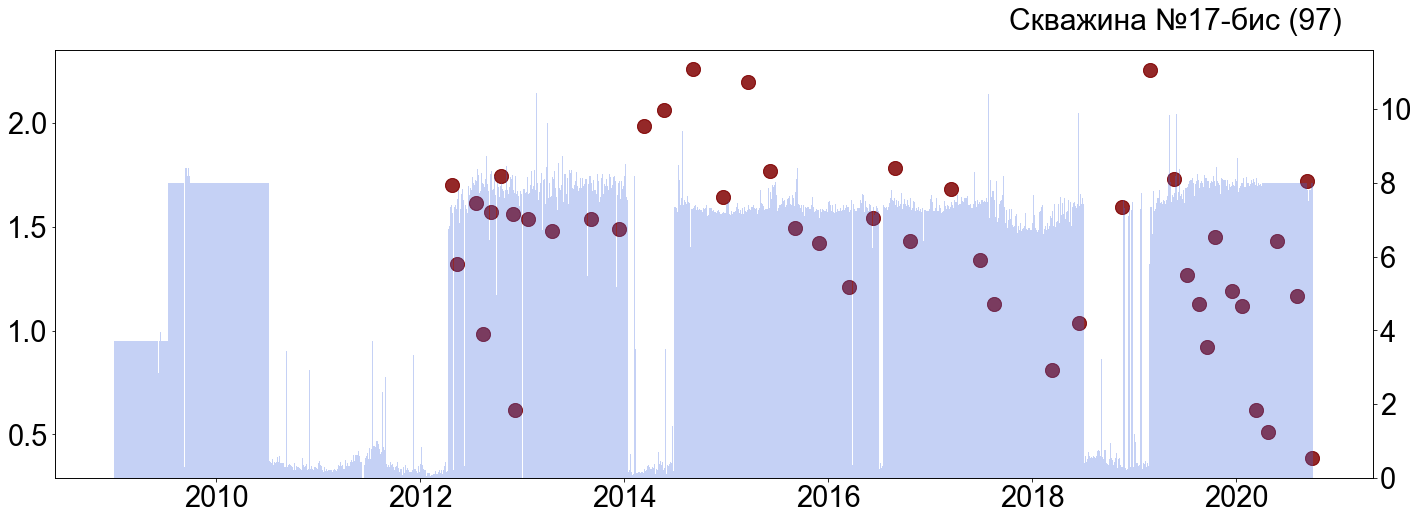

3
251


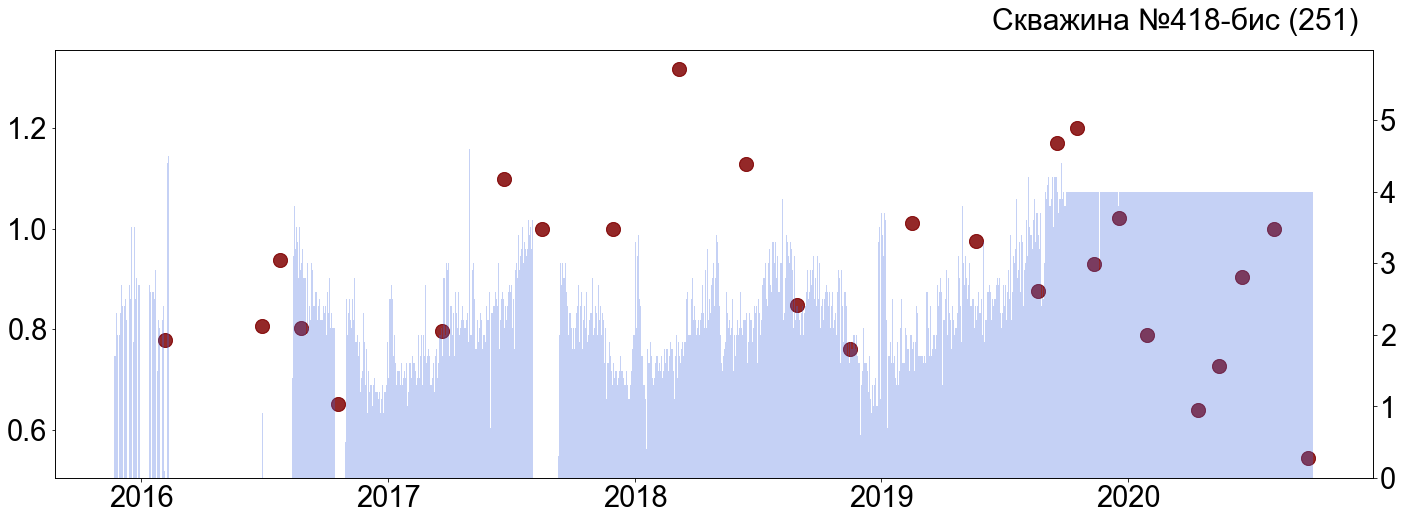

4
10070
5
10071
6
98
7
250
8
355


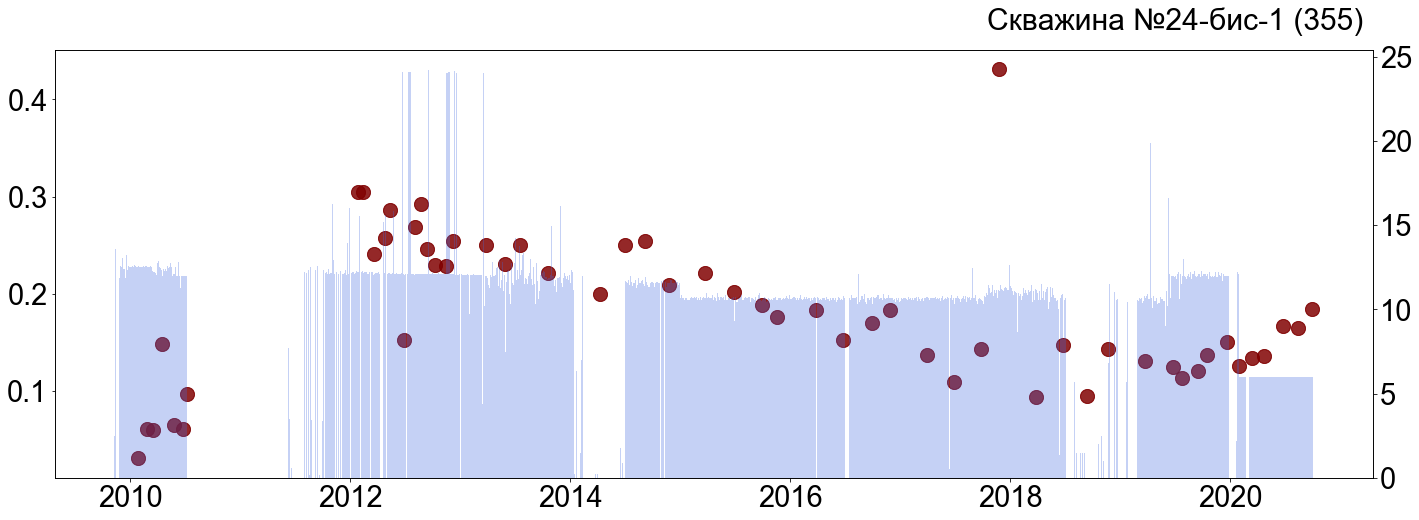

9
100
10
101


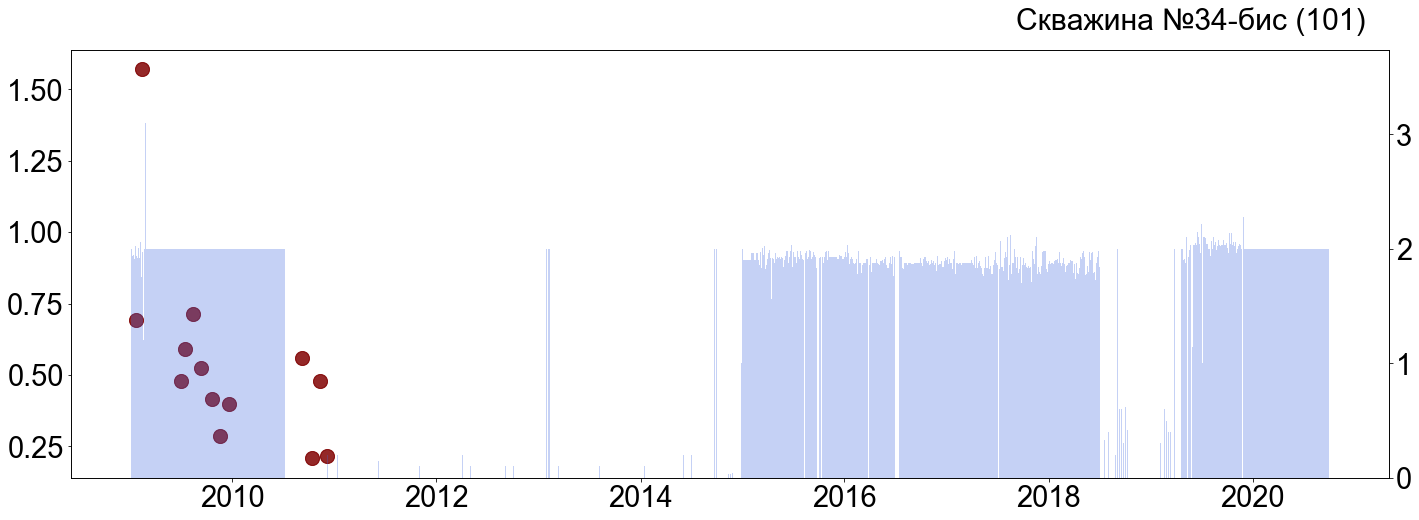

11
243
12
246


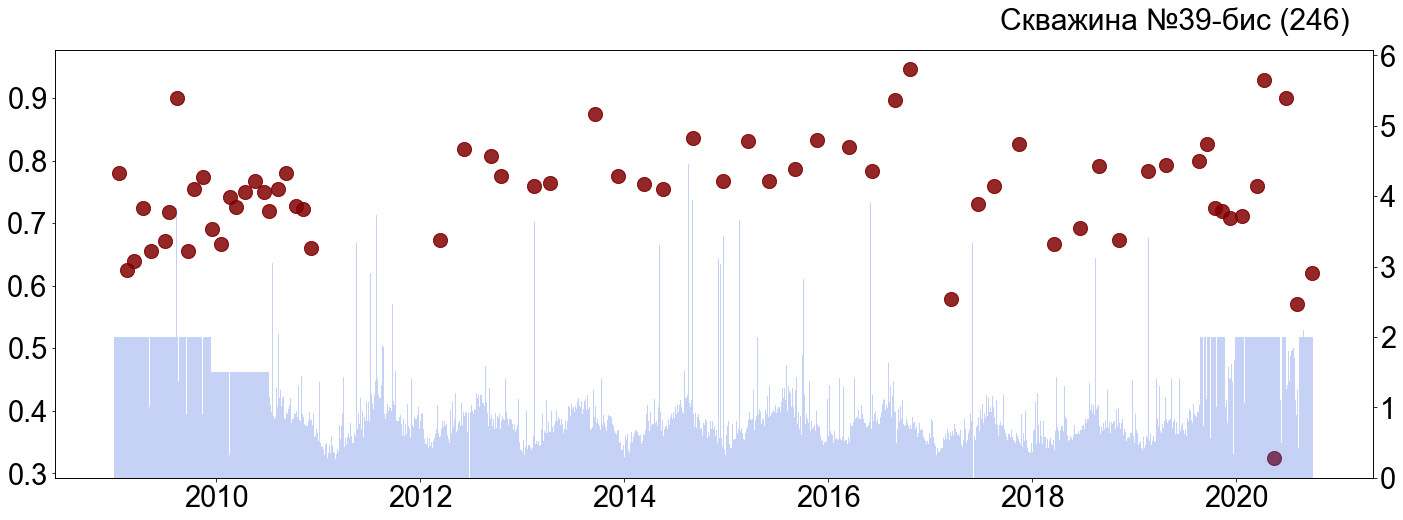

13
110


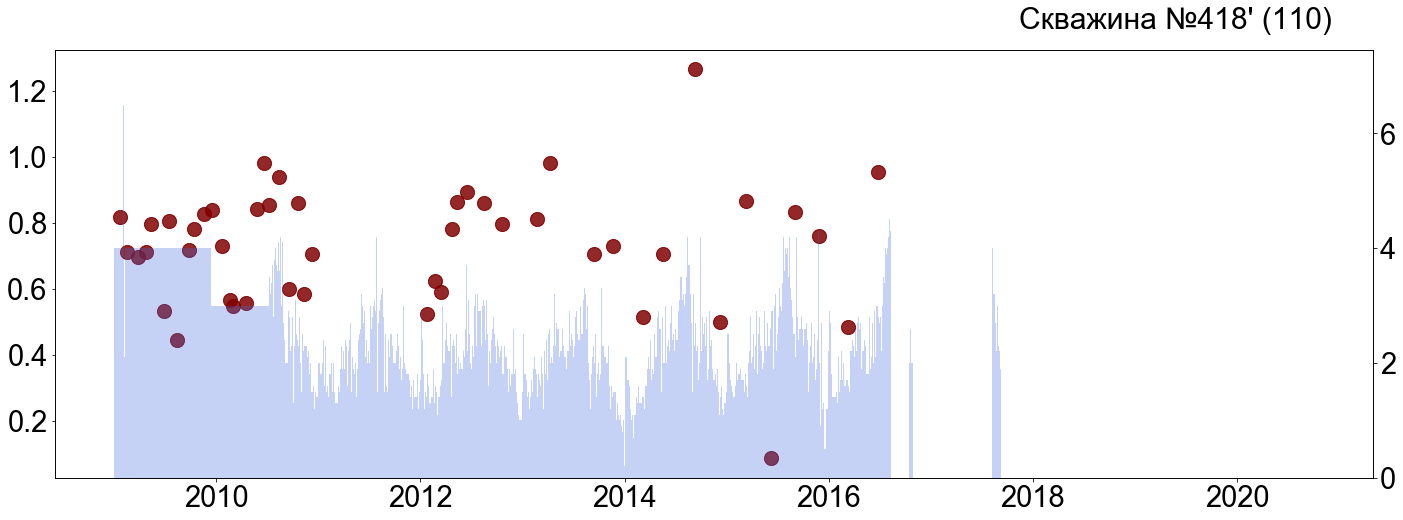

14
104


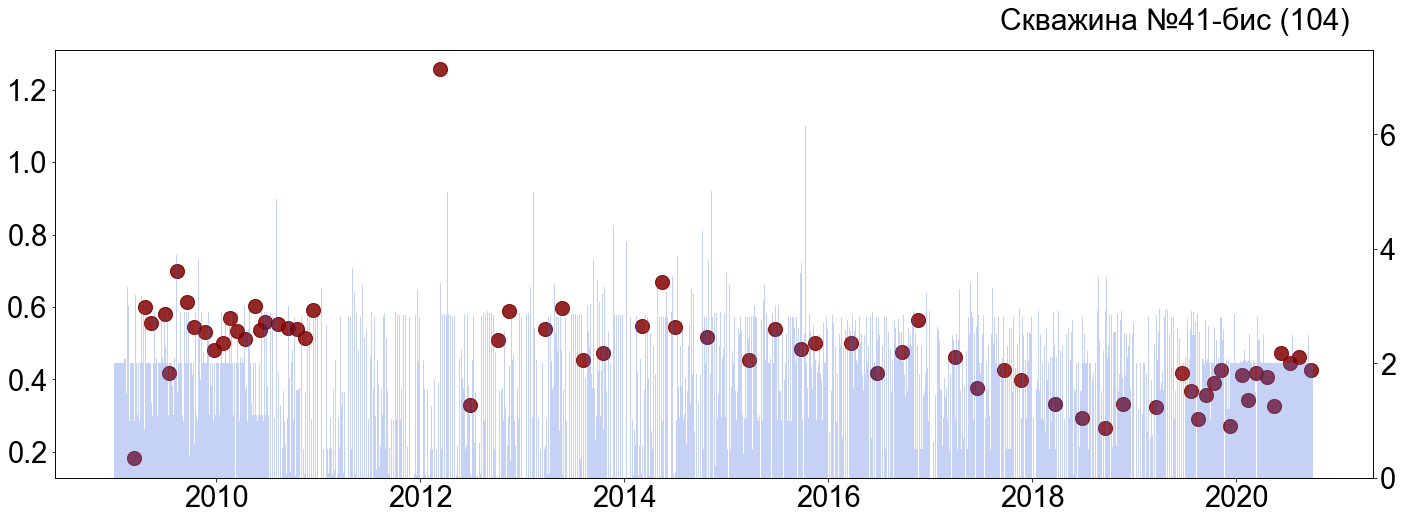

15
105


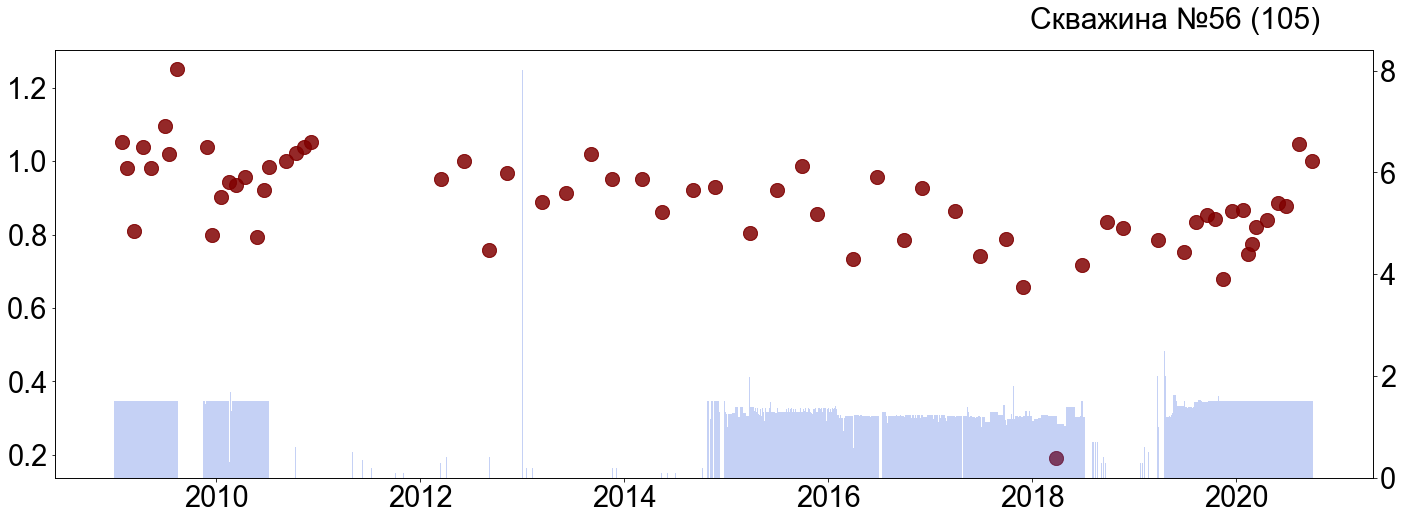

16
107


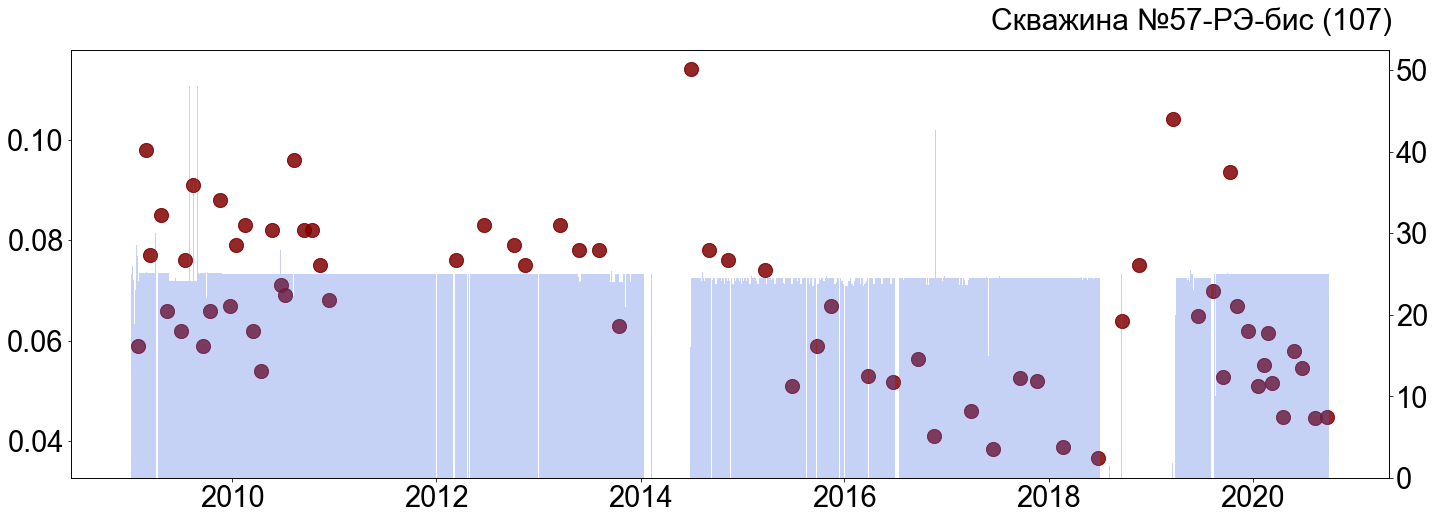

17
111


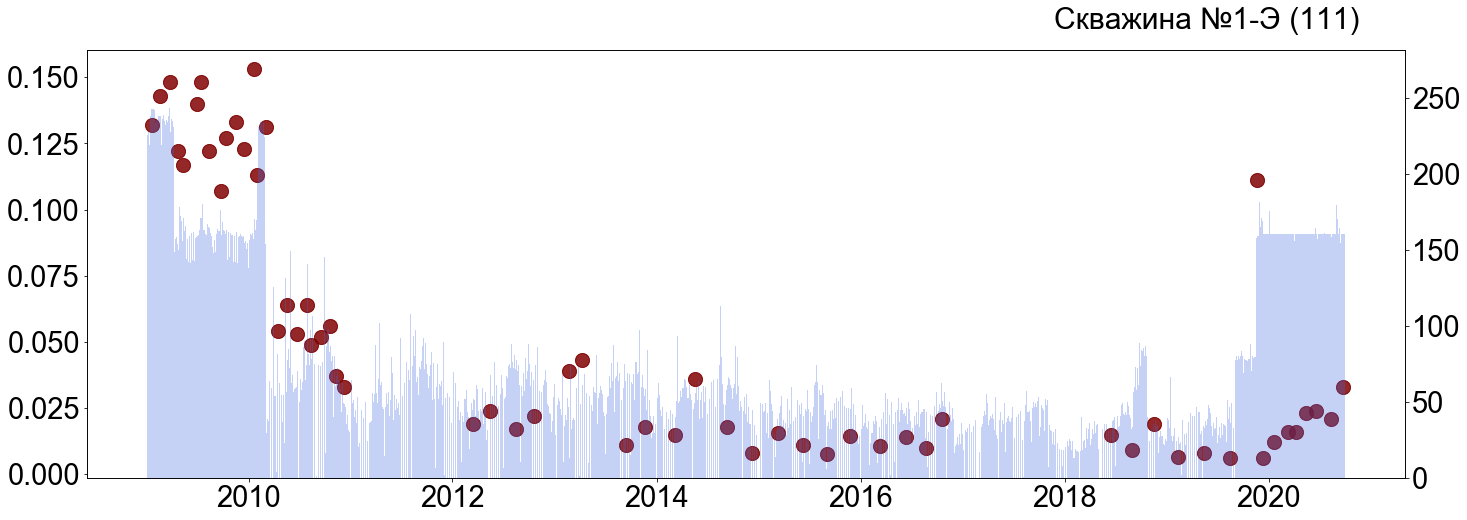

18
112


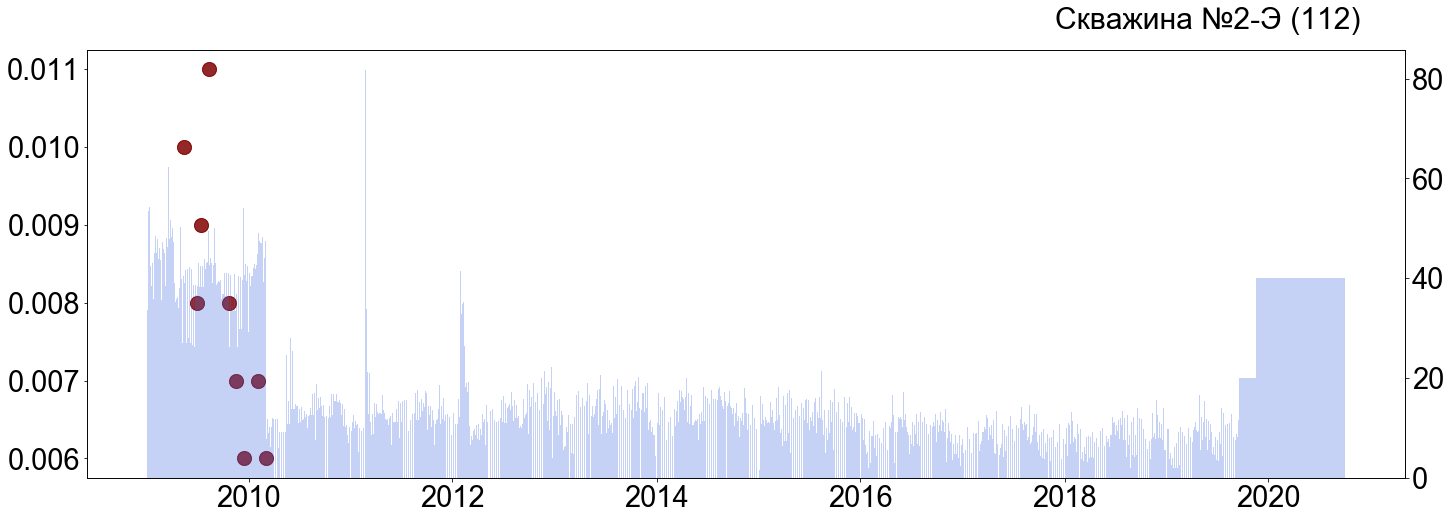

19
141


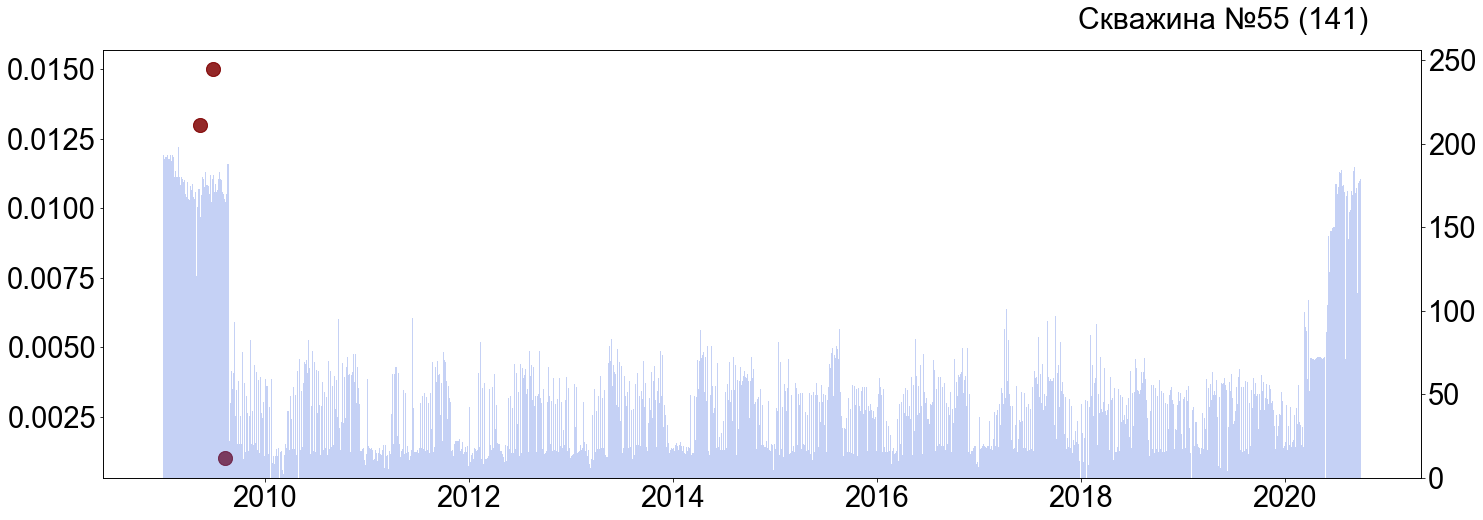

20
140


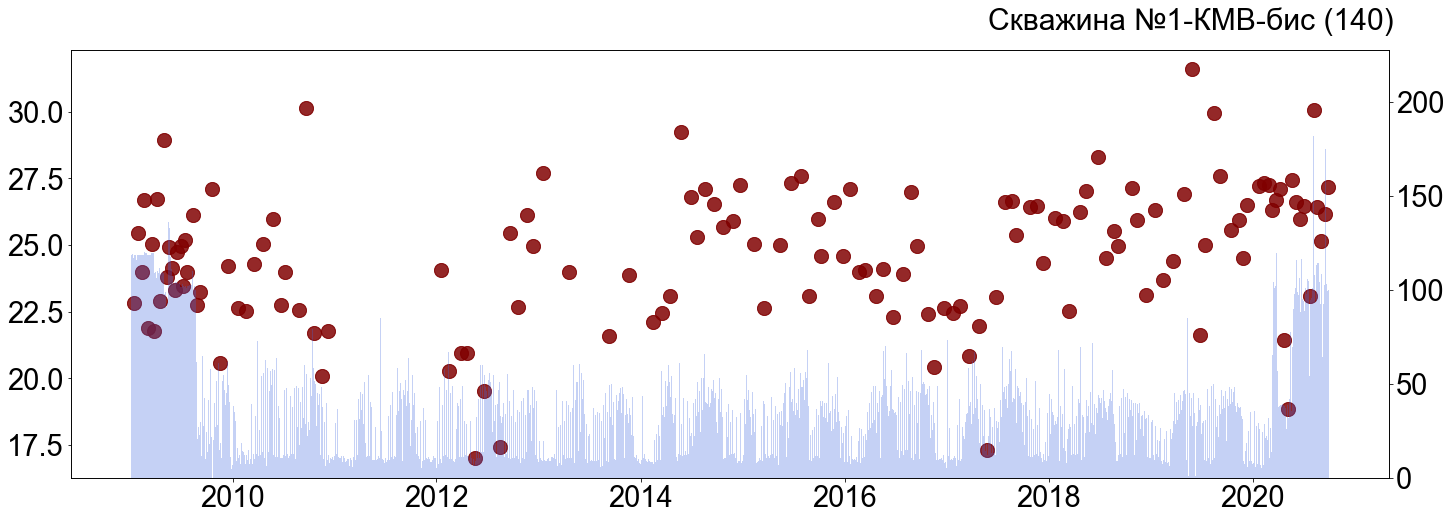

21
106
22
108
23
99
24
114
25
109
26
117
27
122
28
120
29
121
30
119
31
115
32
102
33
116
34
147
35
118


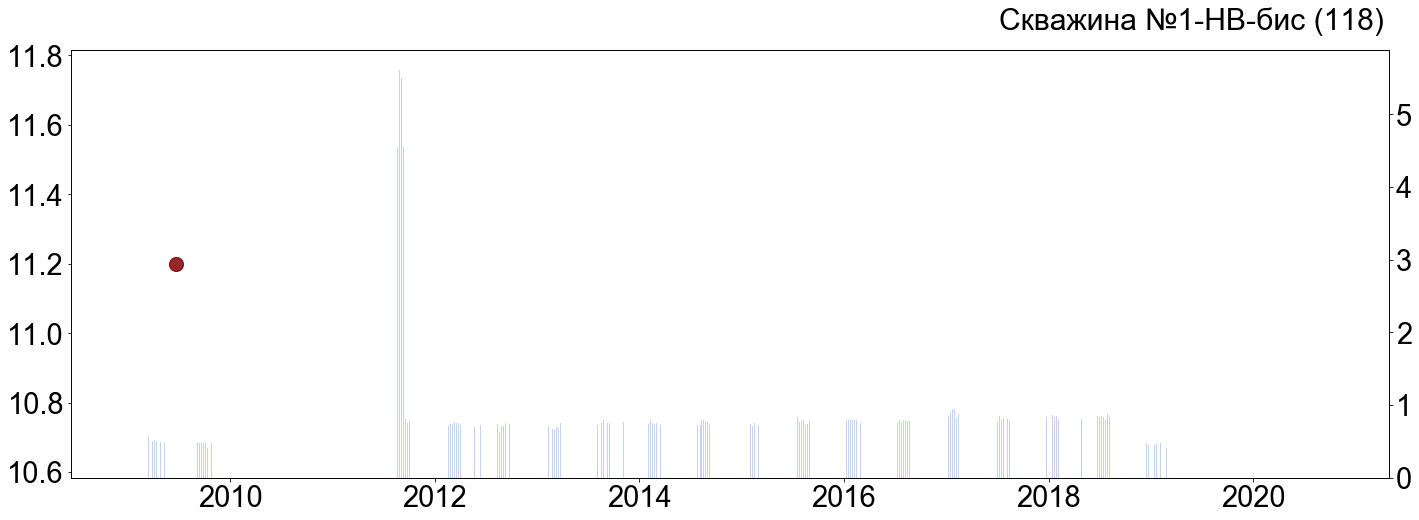

36
143
37
245
38
6001
39
6002


In [181]:
#df_cond['Номер скважины'] = df_cond['Номер скважины'].astype(str)
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
xlim1 = (2009*365, 2021.5*365)
def Create_Figure_for_single_well():
    for a in range(0,len(wellnumbers)):
        print(a)
        print(wellnumbers[a])
        well = df[df['IDPN'] == wellnumbers[a]]
        well = well[(well['ДАТА'] > xlim)]
        
        countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
        #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
        if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
            

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
            ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
                xy=(0.85, 1.1), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='top',
                fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
            lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_(м3_в_м3)_ID_7062'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
            ax1 = ax.twinx()
            lns3 = ax1.bar(x=well['ДАТА'], height =well['ДЕБИТ_СБОРНЫЙ_М3_СУТ'], width = 1, alpha = 0.3, color = "royalblue",label = 'Дебит')
            
            #lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
            plt.show()
Create_Figure_for_single_well()            

######################################################\
Расчет газового фактора при НТД для 1-КМВ-Бис на 
2019-11-28 00:00:00	газ фактор = 24.504999\
######################################################

In [47]:
df_chem_2e =df_chem_msu[df_chem_msu['IDPN'] ==140]
df_dyn_temp =df_dyn[df_dyn['IDPN'] == 140]
df_dyn

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Газовый_фактор_(м3_в_м3)_ID_7062,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Напор_ДО_отбора_(ЕЗМВ_Р)__(АО_метры)_ID_7084,Напор_ПРИ_отборе_(ЕЗМВ_Р)__(АО_метры)_ID_7085,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,ПОТЕРИ_при_отборе_(ЕЗМВ_Р)__(литр)_ID_7088,СБРОС_(ЕЗМВ_Р)__(метр_куб)_ID_7089,Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606
0,2000,11,13,0,0,243,2000-11-13 00:00:00,0.05,NaN,622.87,623.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,-3.450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [152]:
time = ('2019-11-28')
time

'2019-11-28'

In [153]:
df_dyn_temp['ДАТА'] = pd.to_datetime(df_dyn_temp['ДАТА'])

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_atm = df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna()
df_atm
df_atm['ДАТА']	 = pd.to_datetime(df_atm['ДАТА'])

In [41]:
temperature = df_dyn_temp[['ДАТА','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076']].dropna().loc[df_dyn_temp['ДАТА'] == time, 'Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076'].values
temperature

array([10.85302067])

In [42]:
atm_pressure = df_atm[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().loc[df_atm['ДАТА'] == "2019-05-31 00:00:00"	, 'P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].to_numpy()*7.50062
atm_pressure

array([710.60225633])

In [43]:
gaz =df_dyn_temp[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna().loc[df_dyn_temp['ДАТА'] == time, 'Газовый_фактор_(м3_в_м3)_ID_7062'].values
gaz

array([24.50499916])

In [153]:
water_pressure = 7.2

In [154]:
gaz_ntd = 0.3595*gaz*((atm_pressure-12)/(273.2+temperature))
gaz_ntd

array([21.66627039])

In [158]:
P_ust = df_dyn_temp[['ДАТА','Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075']].dropna().loc[df_dyn_temp['ДАТА'] == time, 'Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075'].values
P_ust1 = df_dyn_temp[['ДАТА','Напор вычисленный АО (м)']].dropna().loc[df_dyn_temp['ДАТА'] == time, 'Напор вычисленный АО (м)'].values
#P_ust = P_ust*9.80665
print(P_ust+671.35) 
print(P_ust1) 

[827.80640564]
[827.99640564]


In [156]:
 df_dyn_temp[['ДАТА','Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075']].dropna()

,ДАТА,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075
417209,2019-08-27,173.291412
417266,2019-08-28,167.535065
417322,2019-08-29,168.607803
417375,2019-08-30,167.094238
417428,2019-08-31,161.816757
...,...,...
437616,2020-09-03,189.969437
437665,2020-09-04,190.128174
437715,2020-09-05,190.007324
437765,2020-09-06,190.000931


In [158]:
df_atm[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().loc[df_atm['ДАТА'] == "2019-05-31 00:00:00"	, 'P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].to_numpy()

array([94.73913574])

######################################################\
Расчет газового фактора при НТД для 17-Бис	Газовый фактор взят на 2019-10-16 и равен = 1.449, химия взята из 2019-25-11 
######################################################

In [166]:
time = ('2019-10-16')
time
df_dyn_temp['ДАТА'] = pd.to_datetime(df_dyn_temp['ДАТА'])
df_atm = df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna()
df_atm
df_atm['ДАТА']	 = pd.to_datetime(df_atm['ДАТА'])

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
temperature = df_dyn_temp[['ДАТА','Температура_воды_(Градус_С)_ID_7058']].dropna().loc[df_dyn_temp['ДАТА'] == time, 'Температура_воды_(Градус_С)_ID_7058'].values
temperature

array([13.30000019])

In [174]:
atm_pressure = df_atm[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().loc[df_atm['ДАТА'] == "2019-05-31 00:00:00"	, 'P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].to_numpy()*7.50062
atm_pressure

array([710.60225633])

In [175]:
gaz =df_dyn_temp[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna().loc[df_dyn_temp['ДАТА'] == time, 'Газовый_фактор_(м3_в_м3)_ID_7062'].values
gaz

array([1.449])

In [176]:
water_pressure = 8.5

In [177]:
gaz_ntd = 0.3595*gaz*((atm_pressure-12)/(273.2+temperature))
gaz_ntd

array([1.27020155])

In [179]:
df_atm[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().loc[df_atm['ДАТА'] == "2019-05-31 00:00:00"	, 'P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].to_numpy()

array([94.73913574])

In [200]:
df_dyn_temp =df_dyn[df_dyn['IDPN'] == 6001]
df_dyn_temp

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Газовый_фактор_(м3_в_м3)_ID_7062,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Напор_ДО_отбора_(ЕЗМВ_Р)__(АО_метры)_ID_7084,Напор_ПРИ_отборе_(ЕЗМВ_Р)__(АО_метры)_ID_7085,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,ПОТЕРИ_при_отборе_(ЕЗМВ_Р)__(литр)_ID_7088,СБРОС_(ЕЗМВ_Р)__(метр_куб)_ID_7089,Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606
5,2000,11,13,0,0,6001,2000-11-13 00:00:00,195.300003,NaN,758.639997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.300003,NaN,NaN,NaN,NaN,119.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [202]:
df2 = df_dyn_temp.groupby("ДАТА").mean()
df2['ДАТА'] = df2.index
df2

,Year,Month,Day,Hour,Minute,IDPN,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Газовый_фактор_(м3_в_м3)_ID_7062,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит_газа_(л/с)_ID_7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Напор_ДО_отбора_(ЕЗМВ_Р)__(АО_метры)_ID_7084,Напор_ПРИ_отборе_(ЕЗМВ_Р)__(АО_метры)_ID_7085,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,ПОТЕРИ_при_отборе_(ЕЗМВ_Р)__(литр)_ID_7088,СБРОС_(ЕЗМВ_Р)__(метр_куб)_ID_7089,Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_статическая_(Градус_С)_ID_7071,ЧАСЫ_РАБОТЫ_СКВАЖИНЫ_В_СУТКИ_(ШТ)_ID_7612,Энтальпия_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7101,Энтальпия_(ЕЗМВ)_Qг_ГАЗА?_(Гкал)_ID_7103,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ГАЗА?_(ГКал)_ID_7610,Энтальпия_ЗА_СУТКИ_(ЕЗМВ)_Q_ОБЩАЯ?_(Гкал)_ID_7606,ДАТА
ДАТА,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-06-07,1994,6,7,0,0,6001,NaN,NaN,NaN,776.499998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

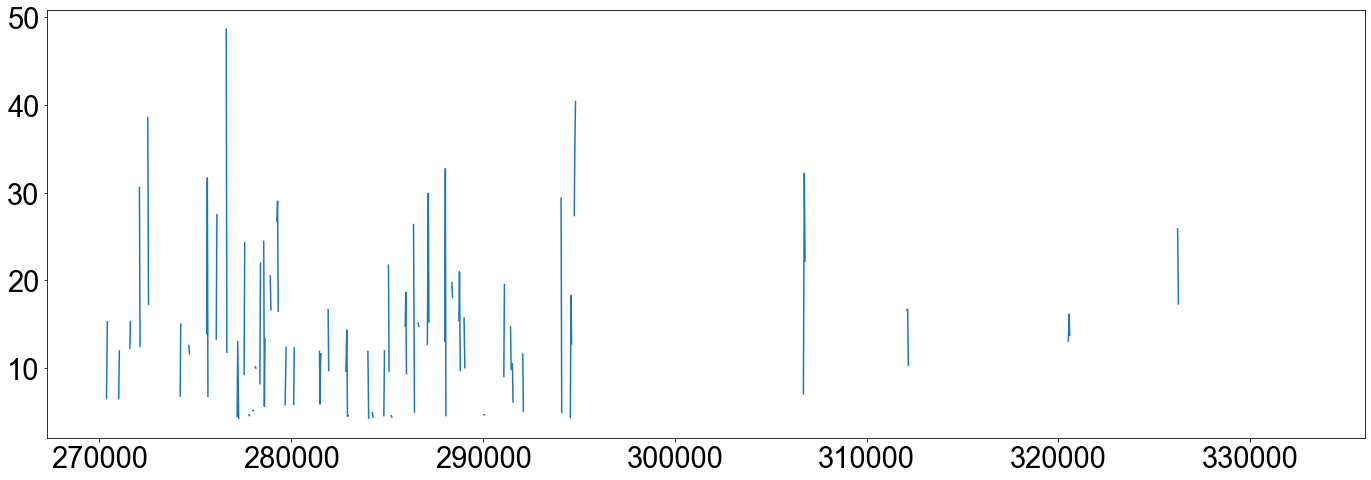

In [159]:
plt.plot(df_dyn_temp.index,df_dyn_temp['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087'])

In [153]:
df_gaz_factor = pd.DataFrame()

In [154]:
df2['ДАТА']

ДАТА
1987-05-06   1987-05-06
1987-05-13   1987-05-13
1987-05-23   1987-05-23
1987-06-04   1987-06-04
1987-06-12   1987-06-12
                ...    
2020-10-04   2020-10-04
2020-10-05   2020-10-05
2020-10-06   2020-10-06
2020-10-07   2020-10-07
2212-08-02   2212-08-02
Name: ДАТА, Length: 6466, dtype: datetime64[ns]

In [132]:
df_info

,ID PN,Номер скважины,ЗАПАСЫ м куб в сутки,ПЛАН ЗАПАСЫ м куб в сутки,Горизонт,АО устья,АО Точки Замера,abs,аотз,Участок,Недропользователь,Назначение скважины,Датчик SOLINST,Положение датчика относительно точки замера,Положение капсулы относительно точки замера,КОД,ДОЛГОТА МЕТРЫ,ШИРОТА МЕТРЫ,ДОЛГОТА ГРАДУСЫ,ШИРОТА ГРАДУСЫ,Тип воды,gkx,gky,glub,сотояние,Примечания
0,90030,73,NaN,NaN,J3tt - K1v,471.34,471.34,NaN,NaN,Быкогорский,"ООО ""Октябрь-А""",эксплуатационная,False,NaN,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None
1,11071,71-н,NaN,NaN,K2,400.64,400.64,NaN,NaN,Западно-Быкогорский,"ООО ""Холод-Розлив""",эксплуатационная резервная наблюдательная,True,0.00,0.0,None,8335551.043,4897007.311,42.943167,44.189361,None,NaN,NaN,NaN,None,None
2,97,17-бис,8.0,8.0,P1d - sl,610.24,611.80,610.429993,612.099976,Центральный,АО «КМКР»,эксплуатационная,False,NaN,NaN,None,8327928.698,4880504.774,42.853278,44.039194,Ессентуки-17 углекислые,4867830.00,3209535.00,125.000000,Эксплуатационная,с 15.06.2011
3,251,418-бис,4.0,4.0,P1d - sl,596.90,595.25,596.330017,598.200012,Центральный,АО «КМКР»,эксплуатационная,True,0.00,0.0,None,8329025.440,4881128.087,42.866750,44.045056,Ессентуки-4 углекислые,4868500.00,3210615.00,157.000000,Эксплуатационная,None
4,10070,70,100.0,100.0,K2,662.20,663.30,NaN,NaN,Горный,"ООО ""Холод-Розлив""",эксплуатационная,True,0.00,0.0,None,8328713.881,4877704.555,42.863972,44.014194,Слабоминерализованная,NaN,NaN,NaN,None,None
5,10071,71,120.0,70.0,K2,399.54,400.64,NaN,NaN,Западно-Быкогорский,"ООО ""Холод-Розлив""",эксплуатационная,True,0.00,0.0,None,8335560.001,4897010.201,42.943278,44.189389,Ессентуки-4 углекислая,NaN,NaN,NaN,None,None
6,98,24,NaN,NaN,P1d - sl,610.66,611.96,610.659973,611.960022,Центральный,АО «КМКР»,наблюдательная,False,NaN,NaN,None,8327621.058,4879901.225,42.849639,44.033694,None,4867210.00,3209240.00,93.889999,Ликвидирована в 2014 г.,"612,21 с патрубком (снят 01.08.2008г)"
7,250,24-бис,NaN,NaN,P1d - sl,611.17,618.74,611.169983,612.049988,Центральный,АО «КМКР»,наблюдательная,False,NaN,NaN,None,8327621.058,4879901.225,42.849639,44.033694,None,4867210.00,3209235.00,97.000000,Резервная,None
8,355,24-бис-1,12.0,6.0,P1d - sl,611.17,618.74,612.159973,612.549988,Центральный,АО «КМКР»,эксплуатационная,False,NaN,NaN,None,8327621.058,4879901.225,42.849639,44.033694,"Ессентуки-17 слабоуглекислые, борные",4867208.22,3209241.49,96.000000,Эксплуатационная,привязка-нижний фланец (39см патрубок)
9,100,33-бис,3.0,3.0,P1d - sl,616.05,616.05,613.960022,616.469971,Центральный,АО «КМКР»,эксплуатационная,False,NaN,NaN,None,8329167.080,4881779.126,42.868306,44.050944,Ессентуки-4,4869115.00,3210795.00,212.000000,Эксплуатационная,None


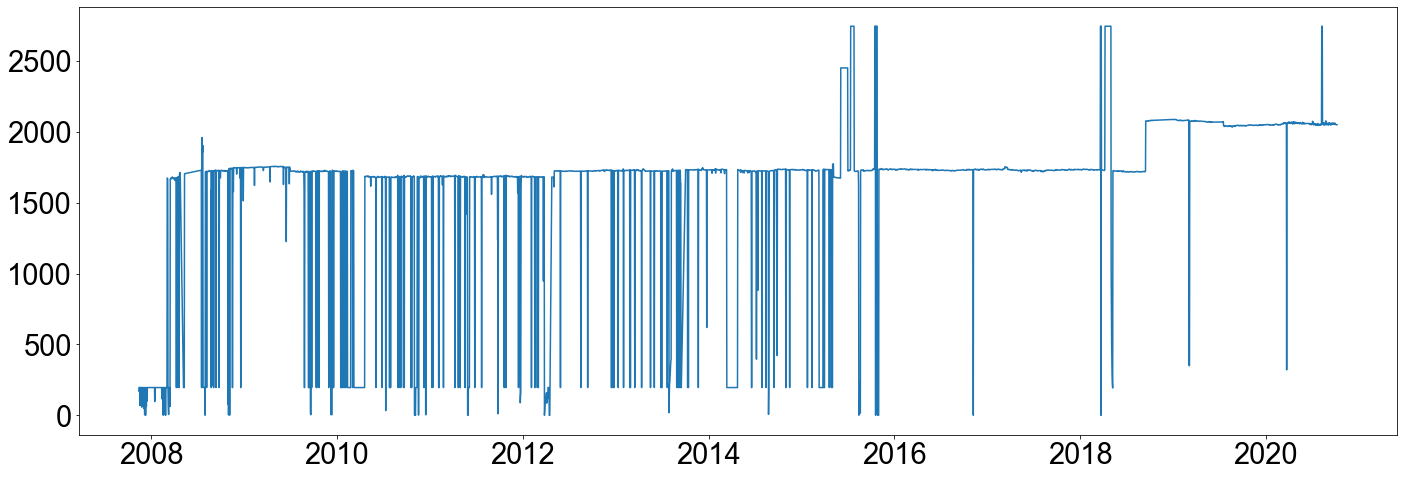

In [193]:
plt.plot(df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572'].dropna()*98.0665)

In [203]:

df_gaz_factor['ДАТА']= df2['ДАТА']
df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
df_gaz_factor['Напор вычисленный АО (м)'] = df2['Напор вычисленный АО (м)']
df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
df_gaz_factor = df_gaz_factor.dropna()
#a = df_info.loc[df_info['ID PN'] == 6001, 'АО Точки Замера'].values
#df_gaz_factor['Давление'] = (df2['Напор вычисленный АО (м)'] - a)*9.807 #kpa
df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['gaz_factor_atm'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
df_gaz_factor 

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,ДАТА,Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,Давление,debit gaza,gaz_factor,gaz_factor_atm,Напор вычисленный АО (м)
ДАТА,,,,,,,,
2010-01-18,2010-01-18,109.779999,110.720001,196.133000,0.940002,0.008563,0.016574,749.239997
2010-01-19,2010-01-19,69.900002,83.169998,196.133000,13.269997,0.189843,0.367475,748.039998
2010-01-23,2010-01-23,85.379997,89.250000,1068.924813,3.870003,0.045327,0.478174,749.739999
2010-02-04,2010-02-04,133.110001,132.770004,1046.369562,-0.339996,-0.002554,-0.026377,748.339996
2010-02-05,2010-02-05,34.259998,34.459999,196.133000,0.200001,0.005838,0.011300,750.139999
...,...,...,...,...,...,...,...,...
2013-12-06,2013-12-06,96.099998,97.099998,1046.369562,1.000000,0.010406,0.107460,750.640001
2013-12-07,2013-12-07,45.799999,46.099998,1056.176250,0.299999,0.006550,0.068277,748.039998
2014-04-23,2014-04-23,73.400002,73.900002,196.133000,0.500000,0.006812,0.013186,716.139998


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


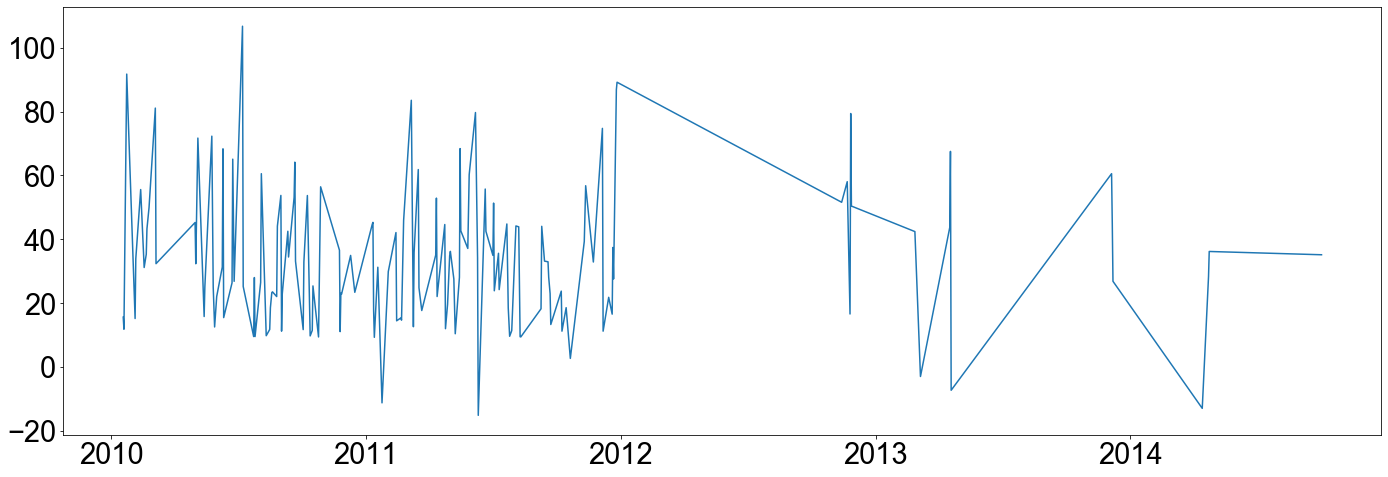

In [118]:
df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
plt.plot(df_gaz_factor['ДАТА'],df_gaz_factor['debit gaza'])

In [122]:
df_gaz_factor['debit gaza'].max()

106.70999526977539

In [121]:
df_gaz_factor

,ДАТА,Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,debit gaza
ДАТА,,,,
2010-01-18,2010-01-18,6.520000,22.129999,15.609999
2010-01-19,2010-01-19,15.260000,27.080000,11.820000
2010-01-23,2010-01-23,30.120001,121.839996,91.719995
2010-02-04,2010-02-04,6.490000,21.660000,15.170000
2010-02-05,2010-02-05,11.940000,45.820000,33.880000
...,...,...,...,...
2013-12-07,2013-12-07,13.750000,40.580002,26.830002
2014-04-14,2014-04-14,15.950000,2.990000,-12.960000
2014-04-23,2014-04-23,25.850000,54.139999,28.289999


0
110
1
104
2
105
3
107
4
111
5
112
6
141
7
140
8
106
9
108
10
99
11
114
12
109
13
117
14
122
15
120
16
121
17
119
18
115
19
102
20
116
21
147
22
118
23
143


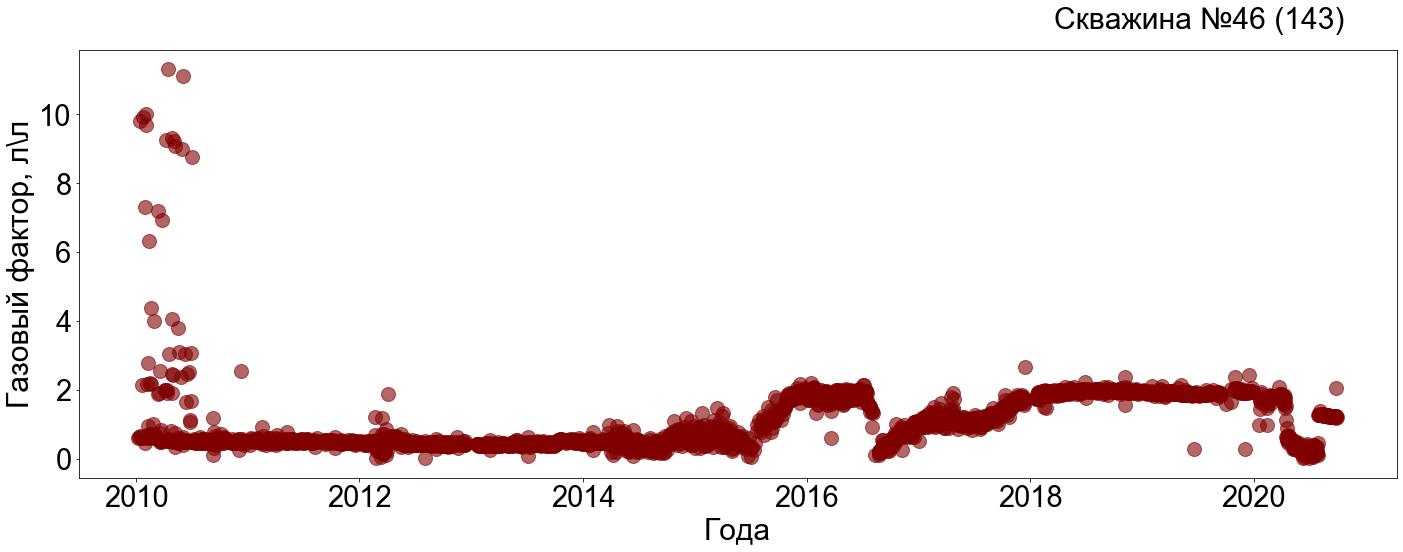

24
245


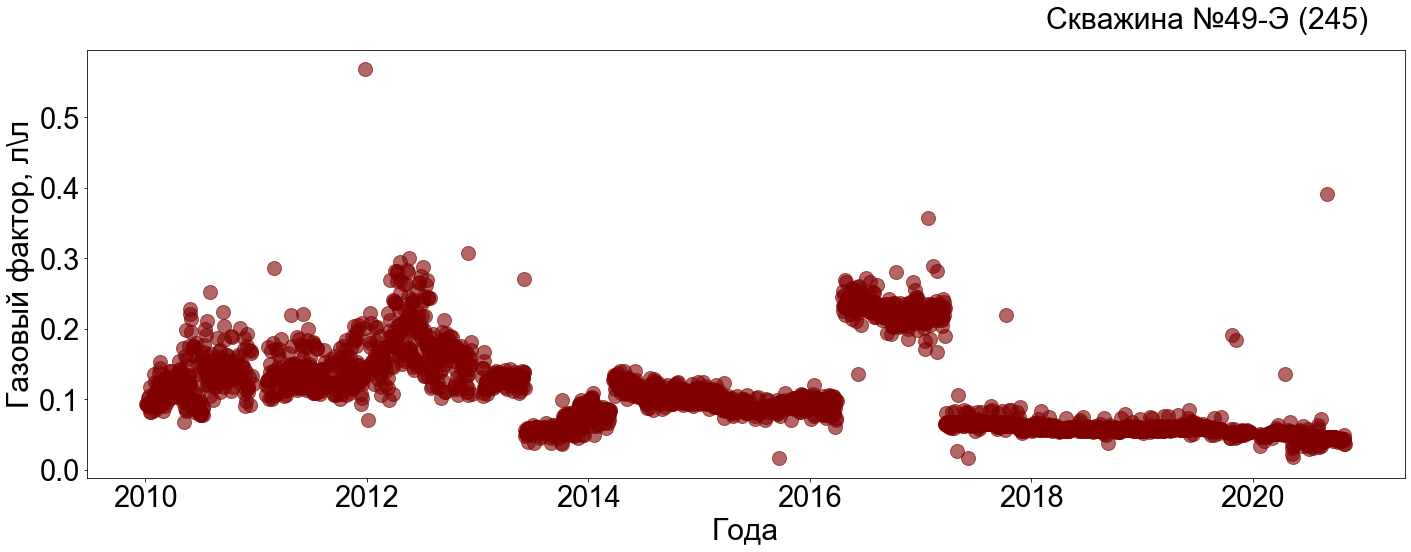

25
6001


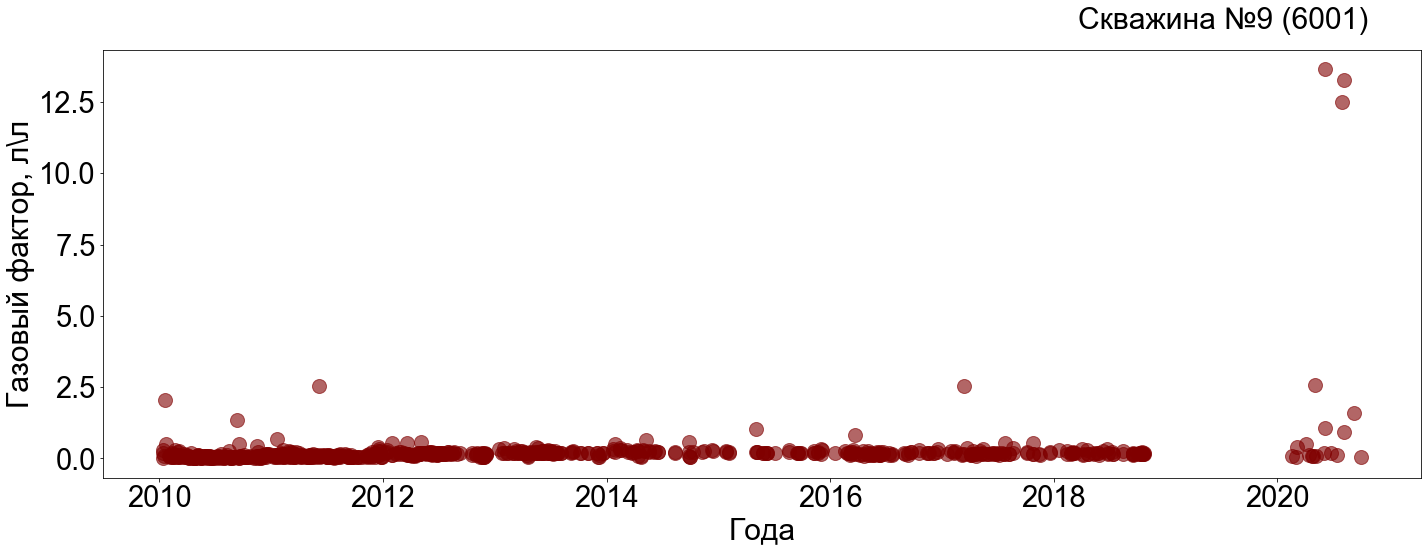

26
6002


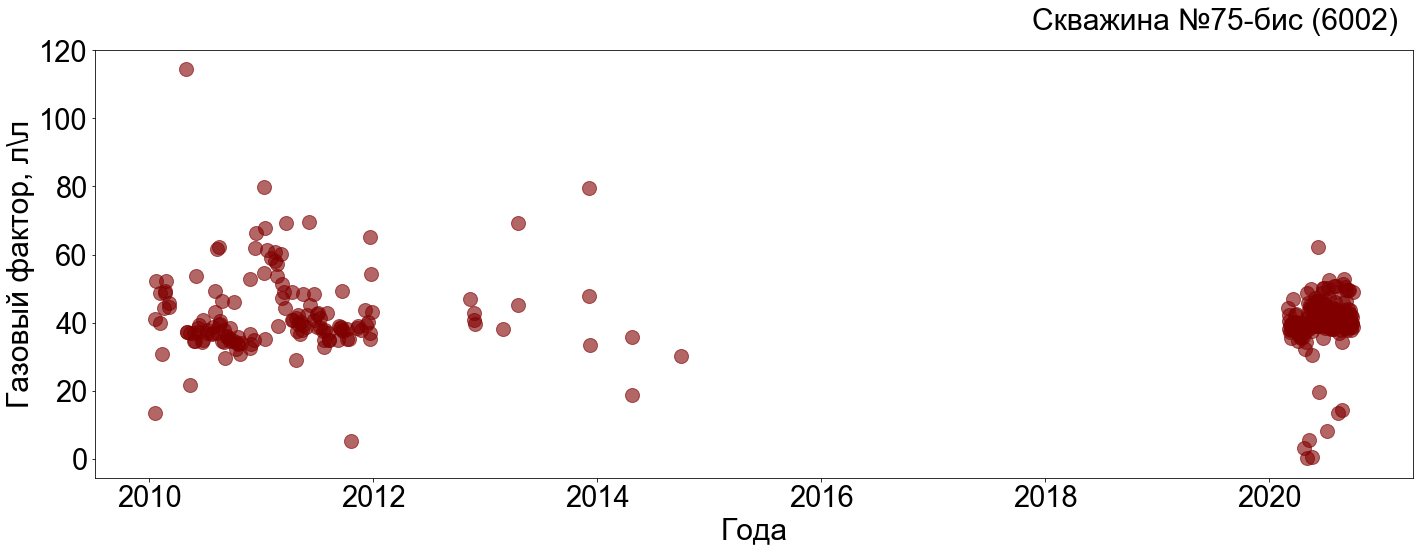

27
90030
28
11071
29
97
30
251
31
10070
32
10071
33
98
34
250
35
355
36
100
37
101
38
243
39
246


In [70]:
#df_cond['Номер скважины'] = df_cond['Номер скважины'].astype(str)
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
#xlim = ('2009-01')
#xlim = datetime.strptime(xlim , '%Y-%m')
#xlim1 = (2009*365, 2021.5*365)
for a in range(0,len(wellnumbers)):
    print(a)
    print(wellnumbers[a])
    well = df[df['IDPN'] == wellnumbers[a]]
#    well = well[(well['ДАТА'] > xlim)]

    countnulls = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        df2 = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_gaz_factor = pd.DataFrame()
        df_gaz_factor['ДАТА']= df2['ДАТА']
        df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
        df_gaz_factor = df_gaz_factor.dropna()

        aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
#        print('a = ',aa)

 #kpa
        df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
        df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor_atm'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
        df_gaz_factor['gaz_factor_atm'] = df_gaz_factor['gaz_factor_atm'][df_gaz_factor['gaz_factor_atm'] > 0]
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
        ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
            xy=(0.85, 1.1), xycoords='axes fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
        lns1 = ax.plot(df_gaz_factor['ДАТА'], df_gaz_factor['gaz_factor_atm'],'o', alpha = 0.6, color = "maroon",label = 'Дебит газа',markersize=14)
        ax.set_ylabel('Газовый фактор, л\л')
        ax.set_xlabel('Года')
        plt.show()


0
110
1
104
2
105
3
107
4
111
5
112
6
141
7
90020
8
140
9
106
10
108
11
99
12
114
13
109
14
117
15
122
16
120
17
121
18
119
19
115
20
102
21
116
22
147
23
118
24
143


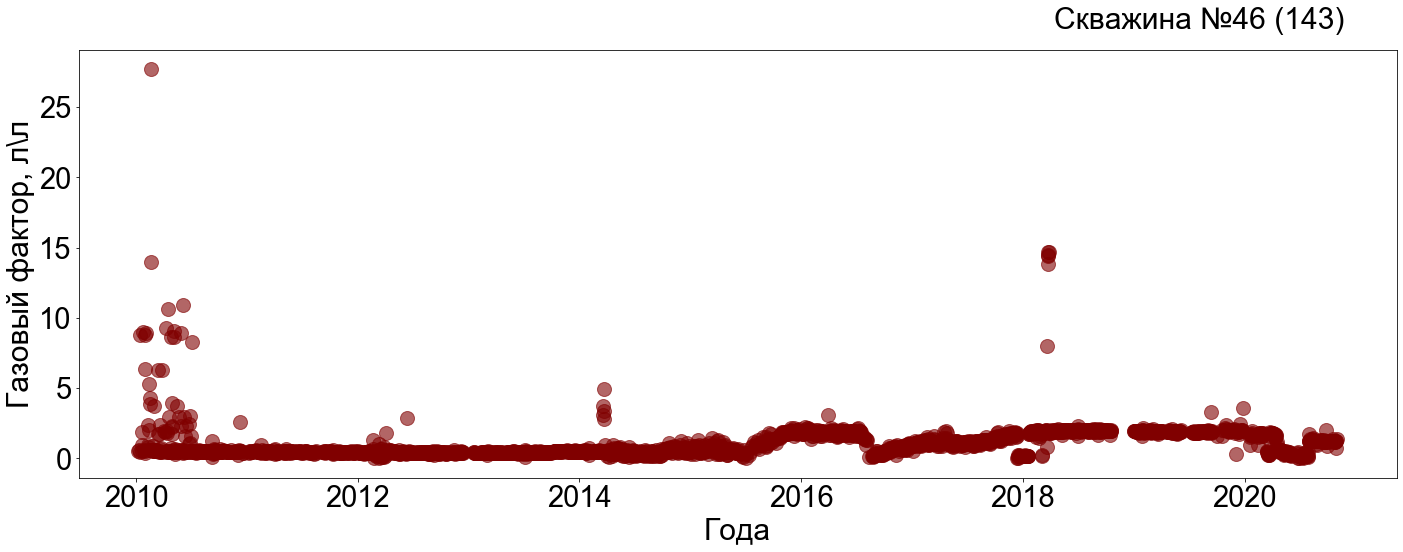

25
245


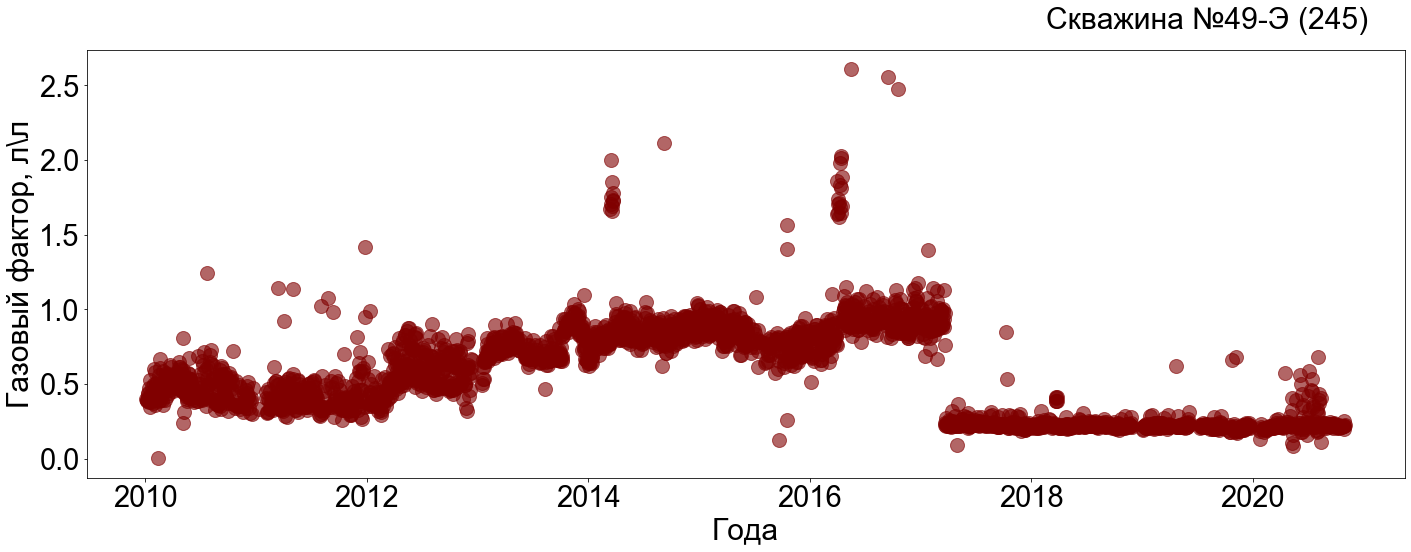

26
6001


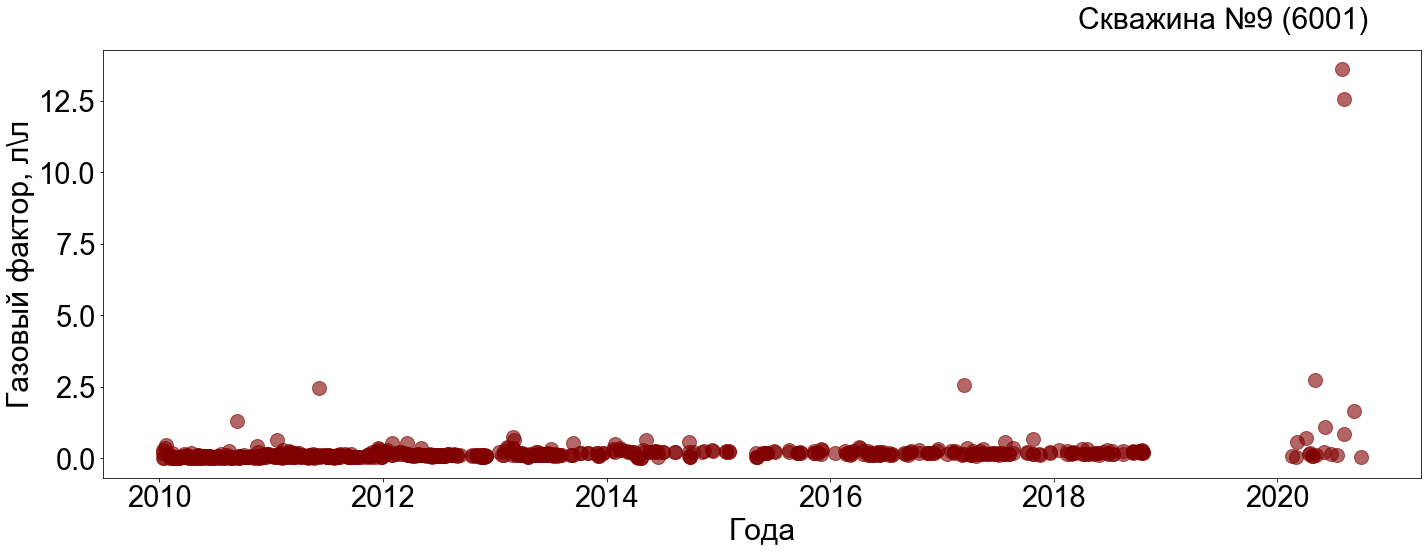

27
6002


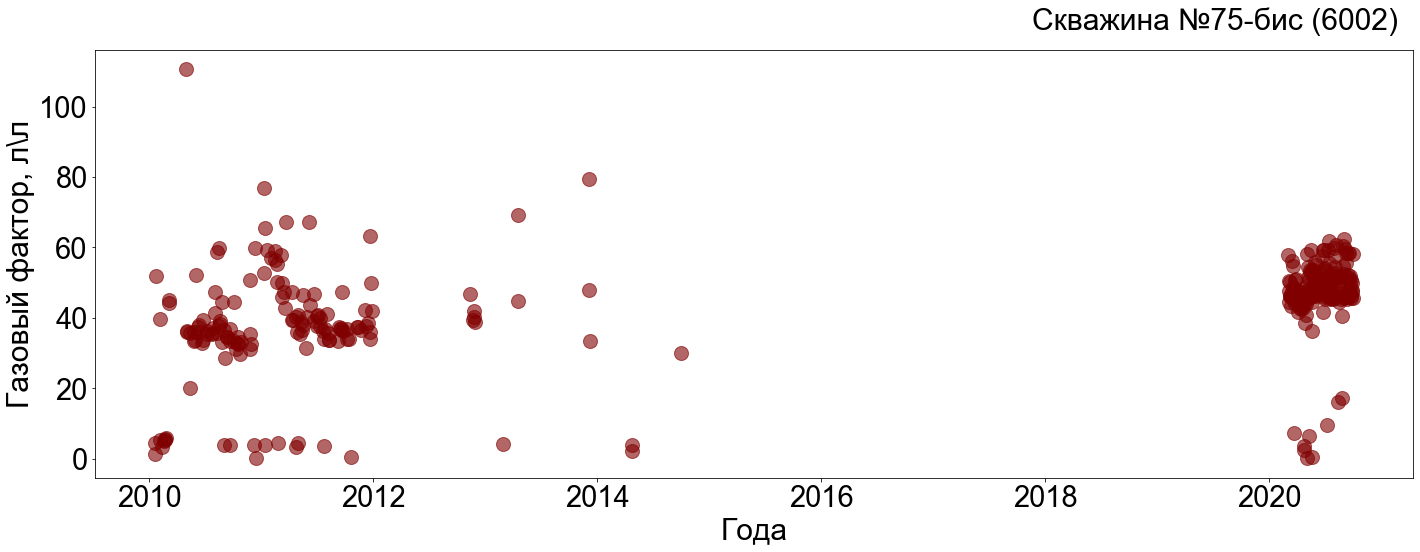

28
90030
29
11071
30
97
31
251
32
10070
33
10071
34
98
35
250
36
355
37
100
38
101
39
243
40
246


In [275]:
#df_cond['Номер скважины'] = df_cond['Номер скважины'].astype(str)
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [60/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
#xlim = ('2009-01')
#xlim = datetime.strptime(xlim , '%Y-%m')
#xlim1 = (2009*365, 2021.5*365)
for a in range(0,len(wellnumbers)):
    print(a)
    print(wellnumbers[a])
    well = df[df['IDPN'] == wellnumbers[a]]
#    well = well[(well['ДАТА'] > xlim)]

    countnulls = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        df2 = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_gaz_factor = pd.DataFrame()
        df_gaz_factor['ДАТА']= df2['ДАТА']
        df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
        df_gaz_factor = df_gaz_factor.dropna()
        df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
#        print('a = ',aa)

 #kpa
#        df_gaz_factor['Давление'] = (df2['Напор вычисленный АО (м)'] - aa)*9.807 #kpa
        df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor_atm'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
        df_gaz_factor['gaz_factor_atm'] = df_gaz_factor['gaz_factor_atm'][df_gaz_factor['gaz_factor_atm'] > 0]
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
        ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
            xy=(0.85, 1.1), xycoords='axes fraction',
            horizontalalignment='center', verticalalignment='top',
            fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
        lns1 = ax.plot(df_gaz_factor['ДАТА'], df_gaz_factor['gaz_factor_atm'],'o', alpha = 0.6, color = "maroon",label = 'Дебит газа',markersize=14)
        ax.set_ylabel('Газовый фактор, л\л')
        ax.set_xlabel('Года')
        plt.show()

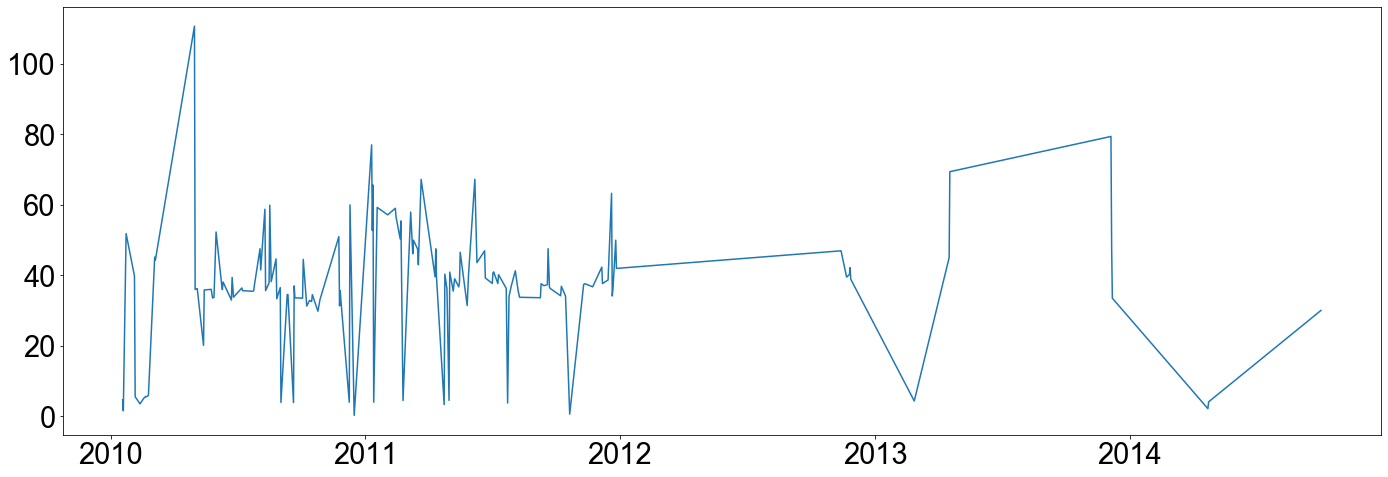

In [194]:
plt.plot(df_gaz_factor['gaz_factor_atm'])

In [165]:
df_gaz_factor['gaz_factor_atm'].max()

496.86646027613335

In [108]:
def reorder_columns(columns, first_cols=[], last_cols=[], drop_cols=[]):
    columns = list(set(columns) - set(first_cols))
    columns = list(set(columns) - set(drop_cols))
    columns = list(set(columns) - set(last_cols))
    new_order = first_cols + columns + last_cols
    return new_order

In [273]:
#wellnumbers = [97,246,110,251,111,112,141,140,106,99,114,116,109,147,117,118,122,102]# list of ints #[pd.unique(df['IDPN'])]
#wellnames = ["1-", "39-бис", "418'","418-бис","1-Э","2-Э","55","1-КМВ-бис","57-РЭ", "36","360","23(23-н)","59-РЭ","45-а","389","1-НВ","21-н","39"] # list of strings
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
for a in range(0,len(wellnumbers)):
    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    #    well = well[(well['ДАТА'] > xlim)]

    countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
        df2 = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        

        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]

        df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
        df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
#############################################################################################
        directory = 'D:\\WORK\\MSU\\Esentuk\\data_gaz_chem_1'
        filename = '\\'+str(wellnames[a]+'.csv')
        fullpath = directory + filename
        if not os.path.exists(directory):
            os.makedirs(directory)
        keepcharacters = (' ','.','_',')','(','\\',':')
        fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
        df_out.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')
    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    if countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('Check_gaz_factor')
        print(wellnames[a])
        df2 = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_gaz_factor = pd.DataFrame()
        df_gaz_factor['ДАТА']= df2['ДАТА']
        df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
        df_gaz_factor = df_gaz_factor.dropna()


#        print('a = ',aa)

 #kpa
        df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
        df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
        df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] > 0]
        df_gaz_factor = df_gaz_factor.reset_index(drop=True)
        df2 =  df2.reset_index(drop=True)
        df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]

        df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'].notna()]
        df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
#############################################################################################
        directory = 'D:\\WORK\\MSU\\Esentuk\\data_gaz_chem_1'
        filename = '\\'+str(wellnames[a]+'.csv')
        fullpath = directory + filename
        if not os.path.exists(directory):
            os.makedirs(directory)
        keepcharacters = (' ','.','_',')','(','\\',':')
        fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
        df_out.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')
        

0
110
418ʹ
YES
1
104
41-бис


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


YES
2
105
56
YES
3
107
57-РЭ-бис
YES
4
111
1-Э
YES
5
112
2-Э
YES
6
141
55
YES
7
90020
1-КМВ
8
140
1-КМВ-бис
YES
9
106
57-РЭ
10
108
58-РЭ
11
99
36
12
114
360
13
109
59-РЭ
14
117
389-н
15
122
21-н
16
120
11-н
17
121
20-н
18
119
7-н
19
115
41
20
102
39
21
116
23 (23-н)
22
147
45-а
23
118
1-НВ-бис
YES
24
143
46
Check_gaz_factor
46
25

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



245
49-Э
Check_gaz_factor
49-Э
26
6001
9
Check_gaz_factor
9
27
6002
75-бис
Check_gaz_factor
75-бис
28
90030
73
29
11071
71-н
30
97
17-бис
YES
31
251
418-бис
YES
32
10070
70
33
10071
71
34
98
24
35
250
24-бис
36
355
24-бис-1
YES
37
100
33-бис
38
101
34-бис
YES
39
243
36-бис
40
246
39-бис
YES


In [201]:
well = df[df['IDPN'] == 6002]
well = well[(well['ДАТА'] > xlim)]
df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]

print('Check_gaz_factor')
#print(wellnames[a])
df2 = pd.DataFrame()
df2 = well.groupby("ДАТА").mean()
df2['ДАТА'] = df2.index
df_gaz_factor = pd.DataFrame()
df_gaz_factor['ДАТА']= df2['ДАТА']
df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
df_gaz_factor = df_gaz_factor.dropna()


#        print('a = ',aa)

#kpa
df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] > 0]
df_gaz_factor = df_gaz_factor.reset_index(drop=True)
df2 =  df2.reset_index(drop=True)
df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012']]
df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
df_out = df_out.reset_index(drop=True)
df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА")
df_out['Давление на устье, kPa'] = (df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807 
my_list = df_out.columns.tolist()
reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'])
df_out = df_out[reordered_cols]

df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'].notna()]
df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]

Check_gaz_factor


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


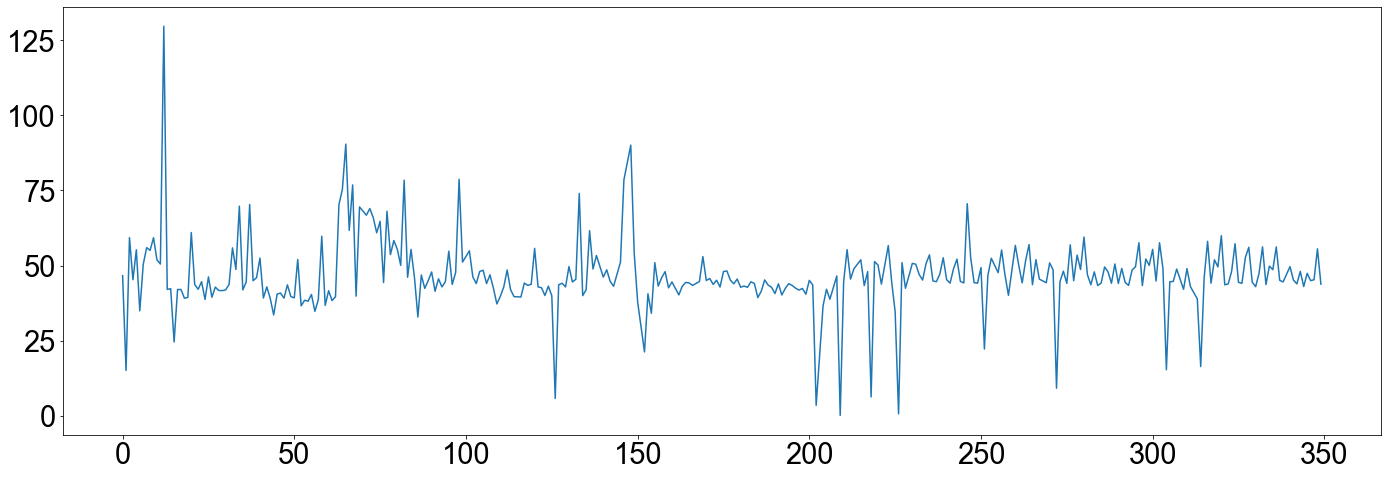

In [194]:
df_ou

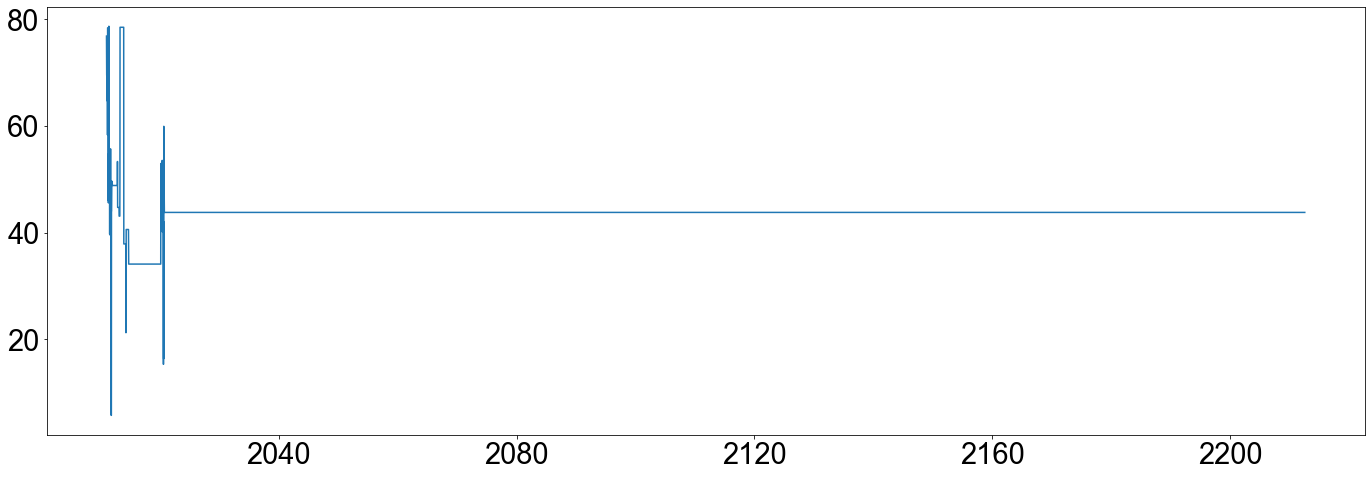

In [200]:
plt.plot(df_out['ДАТА'],df_out['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'])

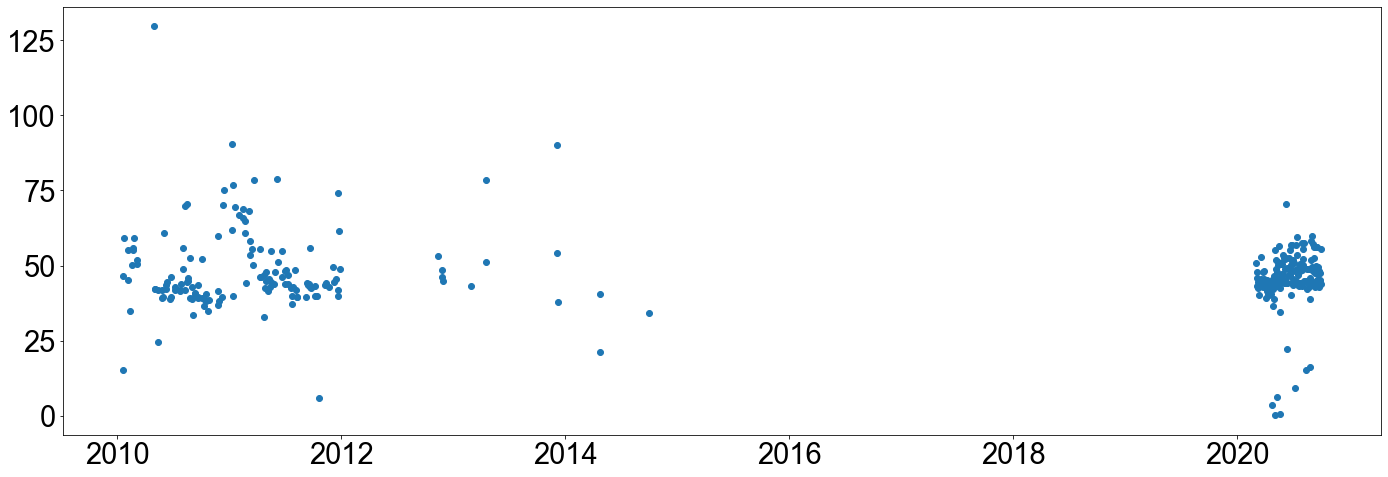

In [205]:
plt.plot(df2['ДАТА'],df2['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'],'o')

In [100]:
df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
df_gaz_factor = df_gaz_factor.dropna()

aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
#        print('a = ',aa)

#kpa
#df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
# df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
# df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
# df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
# df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = df_gaz_factor['gaz_factor_atm'][df_gaz_factor['gaz_factor_atm'] > 0]
df_gaz_factor

,ДАТА,Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,Давление,debit gaza,gaz_factor,gaz_factor_atm,Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam
ДАТА,,,,,,,,


In [62]:
df_out.to_csv('D:\\WORK\\MSU\\Esentuk\\data_gaz_chem_1\\39бис.csv', index=False)

In [248]:
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
well = df[df['IDPN'] == 140]
well = well[(well['ДАТА'] > xlim)]
df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
#    well = well[(well['ДАТА'] > xlim)]

countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
#countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
    df2 = pd.DataFrame()
    df2 = well.groupby("ДАТА").mean()
    df2['ДАТА'] = df2.index
    df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012']]
    df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
    df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
    df_out = df_out.reset_index(drop=True)
    df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА")
    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
            my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]

        df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
        df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [249]:
 df_out

,ДАТА,Газовый_фактор_(м3_в_м3)_ID_7062,pH_водородный_показатель_ID_2201,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,Калий_ион_K+_(грамм_в_литре)_ID_2402,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Минерализация_(грамм_в_литре)_ID_2208,Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_при_отборе_пробы_(Градус_С)_ID_7012,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110
39,2009-02-10,23.993000,6.65,0.90180,0.8157,3.8563,NaN,0.23470,NaN,0.9569,0.95450,6.040,7.76930,NaN,0.8452,NaN,NaN,43.299999,NaN
82,2009-03-25,21.768000,NaN,NaN,0.8342,3.8293,NaN,NaN,NaN,NaN,0.91710,6.018,NaN,NaN,0.9572,NaN,NaN,42.799999,NaN
105,2009-04-17,22.900000,6.79,0.99800,0.8690,3.8714,NaN,0.21890,NaN,0.9028,0.91790,6.080,7.86330,NaN,1.5697,NaN,NaN,41.700001,NaN
117,2009-04-29,28.930000,NaN,NaN,0.8690,3.9222,NaN,NaN,NaN,NaN,0.91250,6.012,NaN,NaN,1.2359,NaN,NaN,42.700001,NaN
131,2009-05-13,23.806999,6.79,0.96590,0.8690,3.8786,NaN,0.24930,NaN,0.8819,0.91170,6.096,7.82490,NaN,0.9579,NaN,NaN,41.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,2020-07-23,23.091999,NaN,NaN,0.8679,3.8455,NaN,NaN,NaN,NaN,0.92300,5.932,NaN,850.834006,0.4410,28.805763,NaN,42.000000,94.271843
4233,2020-08-06,30.063999,6.85,0.93785,0.8773,3.9235,0.0570,0.21910,0.775,1.0131,0.70155,5.722,7.60935,850.935004,0.9400,26.931250,NaN,42.000000,94.476723
4247,2020-08-20,26.440001,NaN,NaN,0.8671,3.6988,NaN,NaN,NaN,NaN,0.92750,5.884,NaN,820.549003,0.4641,27.119625,NaN,42.299999,93.797890
4261,2020-09-03,25.162001,6.80,0.95610,0.8578,3.6175,0.0708,0.22255,0.815,1.2527,0.87330,5.776,7.68810,825.786994,0.5900,27.639994,NaN,42.500000,94.889153


In [11]:
df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna()

,ДАТА,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110
413496,2019-05-30 00:00:00,94.832329
413544,2019-05-31 00:00:00,94.739136
413589,2019-06-01 00:00:00,94.554497
413633,2019-06-02 00:00:00,94.546394
413690,2019-06-03 00:00:00,94.501129
...,...,...
441540,2020-10-30 00:00:00,94.517517
441587,2020-10-31 00:00:00,94.231842
441611,2020-11-01 00:00:00,94.445251
441622,2020-11-02 00:00:00,94.949348


In [40]:
df_out

,ДАТА,pH_водородный_показатель_ID_2201,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,Калий_ион_K+_(грамм_в_литре)_ID_2402,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Минерализация_(грамм_в_литре)_ID_2208,Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Газовый_фактор_(м3_в_м3)_ID_7062,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_при_отборе_пробы_(Градус_С)_ID_7012,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110
0,2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN
1,2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN
2,2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN
3,2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN
4,2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,2020-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.370002,NaN,NaN,NaN,16.758762,NaN,NaN,94.982475
4316,2020-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.897095
4317,2020-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.603256
4318,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.517517


In [274]:
print(wellnames[a])
well = df[df['IDPN'] == 111]
well = well[(well['ДАТА'] > xlim)]
df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
#    well = well[(well['ДАТА'] > xlim)]

countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
#countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
aa = df_info.loc[df_info['ID PN'] ==111, 'АО Точки Замера'].values
if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
    print('YES')
    df2 = pd.DataFrame()
    df2 = well.groupby("ДАТА").mean()
    df2['ДАТА'] = df2.index
    df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012']]
    df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
    df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
    df_out = df_out.reset_index(drop=True)
    df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))

    df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
#    df_out['Давление на устье, kPa'] = df_out['Давление на устье, kPa'].fillna(0)
    df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
df_out

39-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,ДАТА,Газовый_фактор_(м3_в_м3)_ID_7062,pH_водородный_показатель_ID_2201,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,Калий_ион_K+_(грамм_в_литре)_ID_2402,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Минерализация_(грамм_в_литре)_ID_2208,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_при_отборе_пробы_(Градус_С)_ID_7012,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,"Давление на устье, kPa"
0,2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643.240000,NaN,NaN,NaN,25.0,NaN,335.007120
1,2009-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642.970000,NaN,NaN,NaN,25.0,NaN,332.359226
2,2009-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642.870001,NaN,NaN,NaN,25.0,NaN,331.378540
3,2009-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642.870001,NaN,NaN,NaN,25.0,NaN,331.378540
4,2009-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642.789999,NaN,NaN,NaN,25.0,NaN,330.593963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,2020-10-27,NaN,NaN,NaN,NaN,620.7894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.801462,NaN,NaN,94.982475,114.834088
4317,2020-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.897095,114.834088
4318,2020-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.603256,114.834088
4319,2020-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.517517,114.834088


In [259]:
(df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4316    114.834088
4317           NaN
4318           NaN
4319           NaN
4320           NaN
Name: Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО, Length: 4321, dtype: float64

In [260]:
(df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807 

0       335.007120
1       332.359226
2       331.378540
3       331.378540
4       330.593963
           ...    
4316           NaN
4317           NaN
4318           NaN
4319           NaN
4320           NaN
Name: Напор ДИНАМИЧЕСКИЙ вычисленный АО (м), Length: 4321, dtype: float64

In [267]:
df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4316    620.7894
4317         NaN
4318         NaN
4319         NaN
4320         NaN
Name: Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО, Length: 4321, dtype: float64

In [ ]:
wellnumbers = [9002]
wellnames = ['75-бис']
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
for a in range(0,len(wellnumbers)):
    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]

    print('Check_gaz_factor')
    print(wellnames[a])
    df2 = pd.DataFrame()
    df2 = well.groupby("ДАТА").mean()
    df2['ДАТА'] = df2.index
    df_gaz_factor = pd.DataFrame()
    df_gaz_factor['ДАТА']= df2['ДАТА']
    df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
    df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
    df_gaz_factor = df_gaz_factor.dropna()


#        print('a = ',aa)

#kpa
    df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
    df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
    df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
    df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
    df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'] > 0]
    df_gaz_factor = df_gaz_factor.reset_index(drop=True)
    df2 =  df2.reset_index(drop=True)
    df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
    df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
    df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
    df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
    df_out = df_out.reset_index(drop=True)
    df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
    df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
    df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
    my_list = df_out.columns.tolist()
    reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
    df_out = df_out[reordered_cols]

    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062_po_mashinam'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
df_out

In [2]:
df_out

NameError: name 'df_out' is not defined